In [16]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization
import XSpect.XSpect_PostProcessing
import XSpect.XSpect_Diagnostics



**2D Scan**

In [149]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
xas=XSpect.XSpect_Controller.XASBatchAnalysis()
keys=['event_time','ipm5/xpos','epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] #'epix10k2M/azav_azav'
names=['rtime','ipm5_xpos','ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm','ipm5', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
#xas.add_filter('simultaneous','time_tool_ampl',0.001)
xas.add_filter('xray','ipm',500.0)
xas.add_filter('simultaneous','ipm',500.0)

xas.scattering=False
xas.run_parser(['92']) # 7.5 uJ -0.5 to 2 ps
xas.mintime = -1
xas.maxtime = 1
xas.numpoints = 2
# xas.primary_analysis_parallel_loop(4,xas_experiment)
xas.primary_analysis_loop(xas_experiment)
end=time.time()
print('Time binning: {} ps steps'.format(np.min(np.diff(xas.time_bins))))

Time binning: 2.0 ps steps


In [150]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
xas=XSpect.XSpect_Controller.XASBatchAnalysis_1D_ccm()
keys=['event_time','ipm5/xpos','epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] #'epix10k2M/azav_azav'
names=['rtime','ipm5_xpos','ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm','ipm5', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
#xas.add_filter('xray','ipm',500.0)
xas.scattering=False
#xas.add_filter('simultaneous','ipm',500.0)
# xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['85'])
# xas.primary_analysis_parallel_loop(4,xas_experiment)
xas.primary_analysis_loop(xas_experiment)
end=time.time()

In [127]:
bins=np.unique(xas.analyzed_runs[0].ccm_E_setpoint)



norms=xas.analyzed_runs[0].ipm
digitized=np.digitize(xas.analyzed_runs[0].ccm,bins)

In [128]:
binington=np.zeros(np.shape(bins))

In [129]:
digitized

array([ 0,  0,  0, ..., 89, 89, 89])

In [130]:
for idx,i in enumerate(digitized):
    binington[i-1]=binington[i-1]+norms[idx]


(7.175, 7.2)

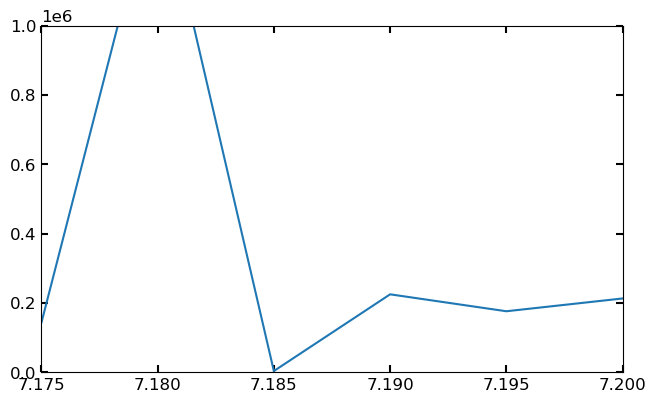

In [131]:
plt.plot(bins,binington)
plt.ylim(0,0.1E7)
plt.xlim(7.175,7.2)

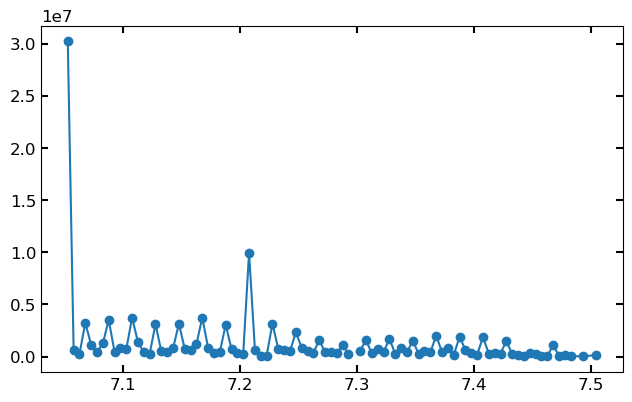

In [165]:
plt.plot(xas.analyzed_runs[0].ccm_bins,xas.analyzed_runs[0].ipm_xray_not_laser_energy_binned,'o-')
#plt.ylim(0,0.1E7)
#plt.xlim(7.175,7.2)

(7.175, 7.2)

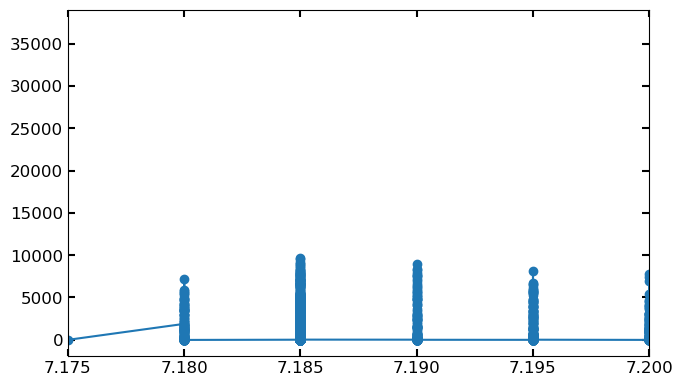

In [102]:
plt.plot(xas.analyzed_runs[0].ccm_E_setpoint,xas.analyzed_runs[0].ipm,'-o')
plt.xlim(7.175,7.2)

In [161]:
xas.analyzed_runs[0].rtime

array([7374019412615294349, 7374019412623624180, 7374019412631923809, ...,
       7374022474907499572, 7374022474915825893, 7374022474924278709])

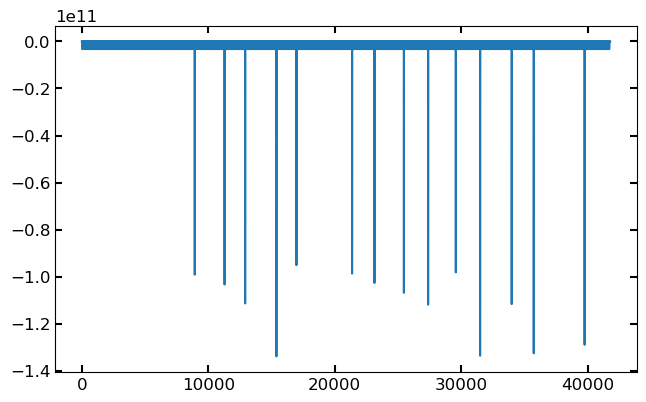

In [162]:
plt.plot([a-b for a,b in zip(xas.analyzed_runs[0].rtime,xas.analyzed_runs[0].rtime[1:])])

(7.17, 7.205)

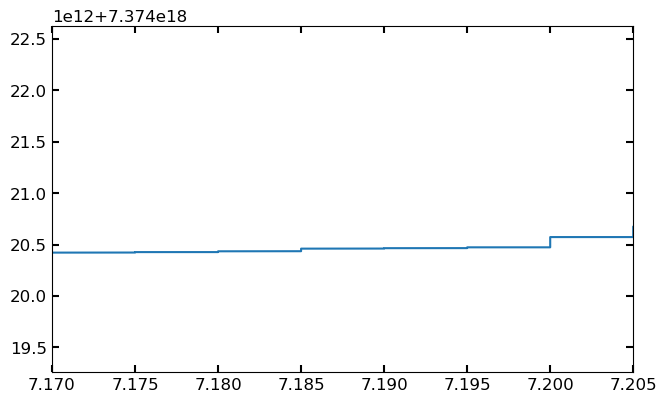

In [157]:
plt.plot(xas.analyzed_runs[0].ccm_E_setpoint,xas.analyzed_runs[0].rtime,)
plt.xlim(7.170,7.205)

In [140]:
fh.

array([7.05      , 7.055     , 7.06      , 7.065     , 7.07      ,
       7.075     , 7.08      , 7.085     , 7.09      , 7.095     ,
       7.1       , 7.105     , 7.11      , 7.115     , 7.12      ,
       7.125     , 7.13      , 7.135     , 7.14      , 7.145     ,
       7.15      , 7.155     , 7.16      , 7.165     , 7.17      ,
       7.175     , 7.18      , 7.185     , 7.19      , 7.195     ,
       7.2       , 7.205     , 7.21      , 7.215     , 7.22      ,
       7.225     , 7.23      , 7.235     , 7.24      , 7.245     ,
       7.25      , 7.255     , 7.26      , 7.265     , 7.27      ,
       7.275     , 7.28      , 7.285     , 7.29      , 7.295     ,
       7.3       , 7.305     , 7.31      , 7.315     , 7.32      ,
       7.325     , 7.33      , 7.335     , 7.34      , 7.345     ,
       7.35      , 7.355     , 7.36      , 7.365     , 7.37      ,
       7.375     , 7.38      , 7.385     , 7.39      , 7.395     ,
       7.4       , 7.405     , 7.41      , 7.415     , 7.42   

/sdf/home/l/lbgee/xcsx1008722/xspect/XSpect/XSpect_Visualization.py:144: RuntimeWarning: invalid value encountered in divide
  laser_on_spectrum=xas_analysis.summed_laser_on/xas_analysis.summed_norm_on


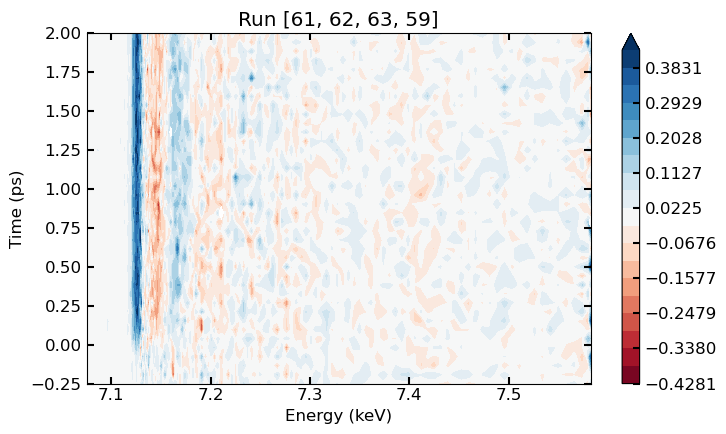

In [72]:

v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas, 
                  xas_laser_key='epix_simultaneous_laser_time_energy_binned',
                  xas_key='epix_xray_not_laser_time_energy_binned',
                  norm_laser_key='ipm_simultaneous_laser_time_energy_binned',
                  norm_key='ipm_xray_not_laser_time_energy_binned',interpolate=True)


v.plot_2d_difference_spectrum(xas)
plt.gca().set_title(f'Run {xas.runs}',)
#plt.xlim(7.105,7.125)
#plt.axvline(7.1245, color = 'r')
plt.tight_layout()

Text(0.5, 1.0, 'Run [61, 62, 63, 59]')

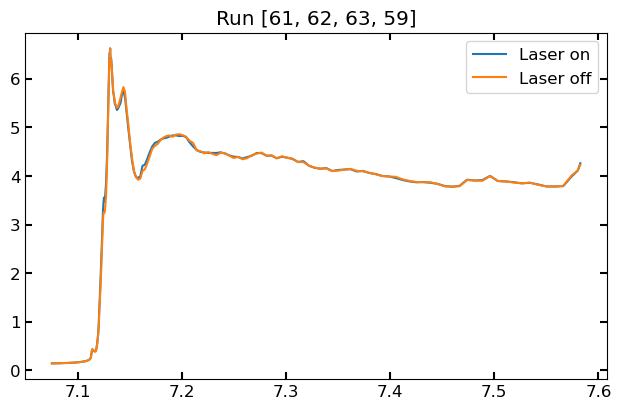

In [73]:
plt.plot(xas.ccm_bins,np.sum(xas.summed_laser_on,axis=0)/np.sum(xas.summed_norm_on,axis=0))
plt.plot(xas.ccm_bins,np.sum(xas.summed_laser_off,axis=0)/np.sum(xas.summed_norm_off,axis=0))
plt.legend(['Laser on','Laser off'])
plt.title(f'Run {xas.runs}')

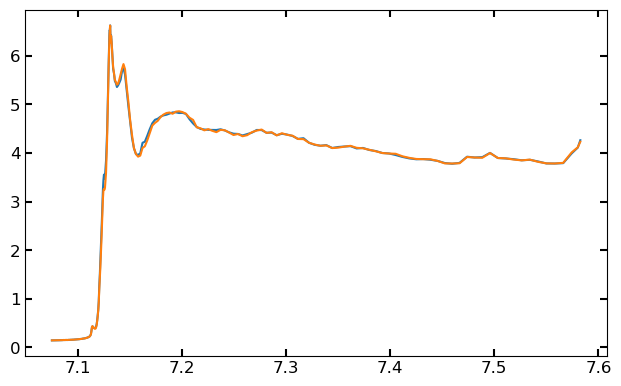

In [74]:
plt.plot(xas.ccm_bins,np.sum(xas.summed_laser_on,axis=0)/np.sum(xas.summed_norm_on,axis=0))
plt.plot(xas.ccm_bins,np.sum(xas.summed_laser_off,axis=0)/np.sum(xas.summed_norm_off,axis=0))

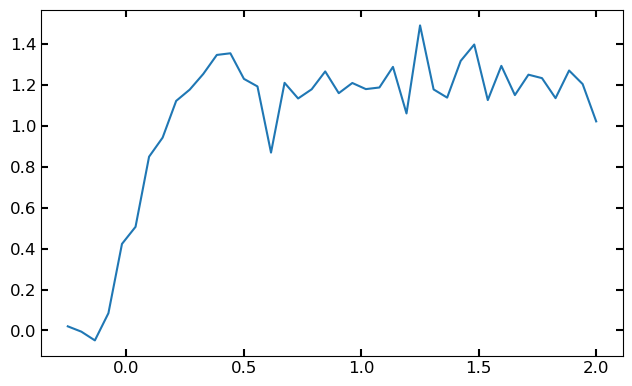

In [75]:
low_e=np.argmin(np.abs(xas.ccm_bins-7.124))
hi_e=np.argmin(np.abs(xas.ccm_bins-7.126))
cut=np.sum(xas.difference_spectrum[:,low_e:hi_e],axis=1)
plt.plot(xas.time_bins,cut)

In [22]:
hi_e

93

In [144]:
import h5py
fh=h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0076.h5')

In [148]:
fh.keys()

<KeysViewHDF5 ['Sums', 'UserDataCfg', 'damage', 'diodeGon', 'ebeam', 'enc', 'epics', 'epicsUser', 'epix_2', 'epix_2_env', 'event_time', 'evr', 'feeBld', 'fiducials', 'gas_detector', 'ipm4', 'ipm5', 'l3t', 'lightStatus', 'phase_cav', 'scan', 'tt']>

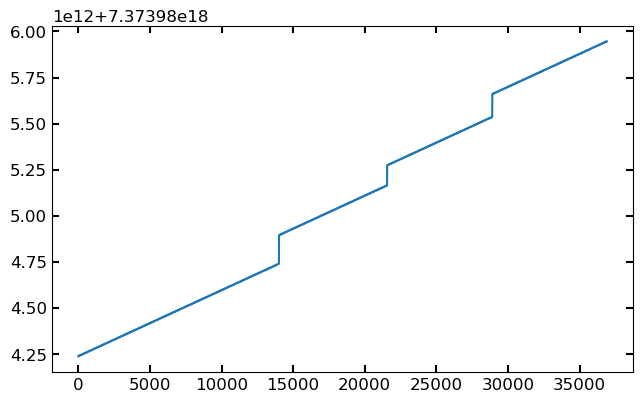

In [147]:
plt.plot(np.array(fh['event_time']),np.array(fh['event_time']))#.keys()

In [13]:
fh_76=h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0076.h5')
ipm_76=np.array(fh_76['ipm5/sum'])
ipm_76_xpos=np.array(fh_76['ipm5/xpos'])
fh_77=h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0077.h5')
ipm_77=np.array(fh_77['ipm5/sum'])
ipm_78=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0078.h5')['ipm5/sum'])
ipm_79=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0079.h5')['ipm5/sum'])
ipm_80=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0080.h5')['ipm5/sum'])
ipm_81=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0081.h5')['ipm5/sum'])

ipm_82=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0082.h5')['ipm5/sum'])
ipm_83=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0083.h5')['ipm5/sum'])
ipm_84=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0084.h5')['ipm5/sum'])
ipm_85=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0085.h5')['ipm4/sum'])

ipm_92=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0092.h5')['ipm4/sum'])
ipm_93=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0093.h5')['ipm4/sum'])

ipm_jeff=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsl1030422/hdf5/smalldata/xcsl1030422_Run0332.h5')['ipm4/sum'])





Text(0.5, 1.0, 'Yesterday Parameters Reversed')

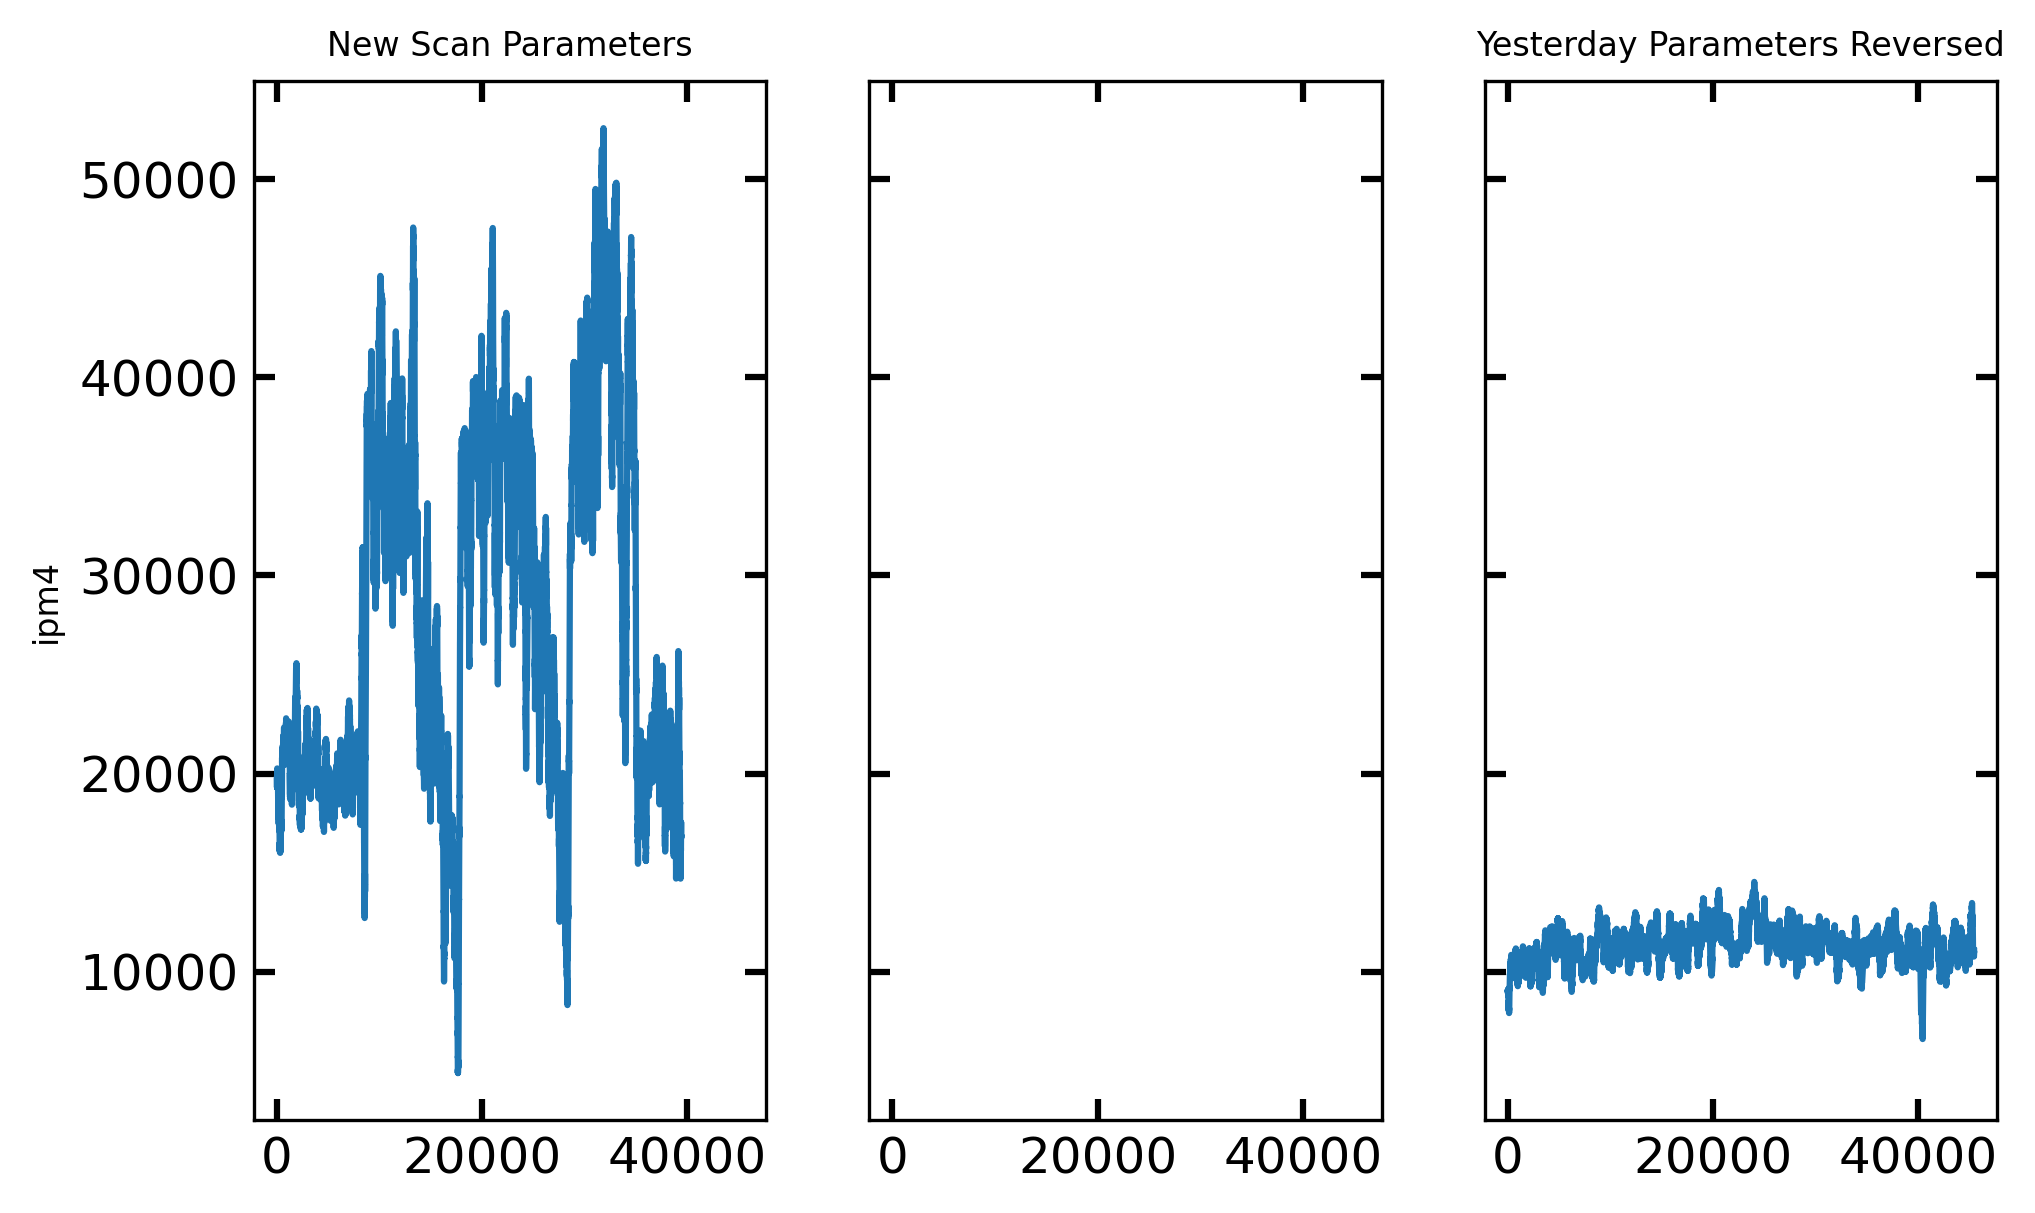

In [15]:
def moving_average(a, n=240,):
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
fig,axs=plt.subplots(1,3,sharey=True,sharex=True,dpi=300)
axs[0].plot(moving_average(ipm_92))
axs[0].set_title('New Scan Parameters',fontsize=8)
axs[0].set_ylabel('ipm4',fontsize=8)
axs[2].plot(moving_average(ipm_jeff))
axs[2].set_title('Yesterday Parameters Reversed',fontsize=8)

Text(0.5, 1.0, 'Yesterday Parameters Reversed')

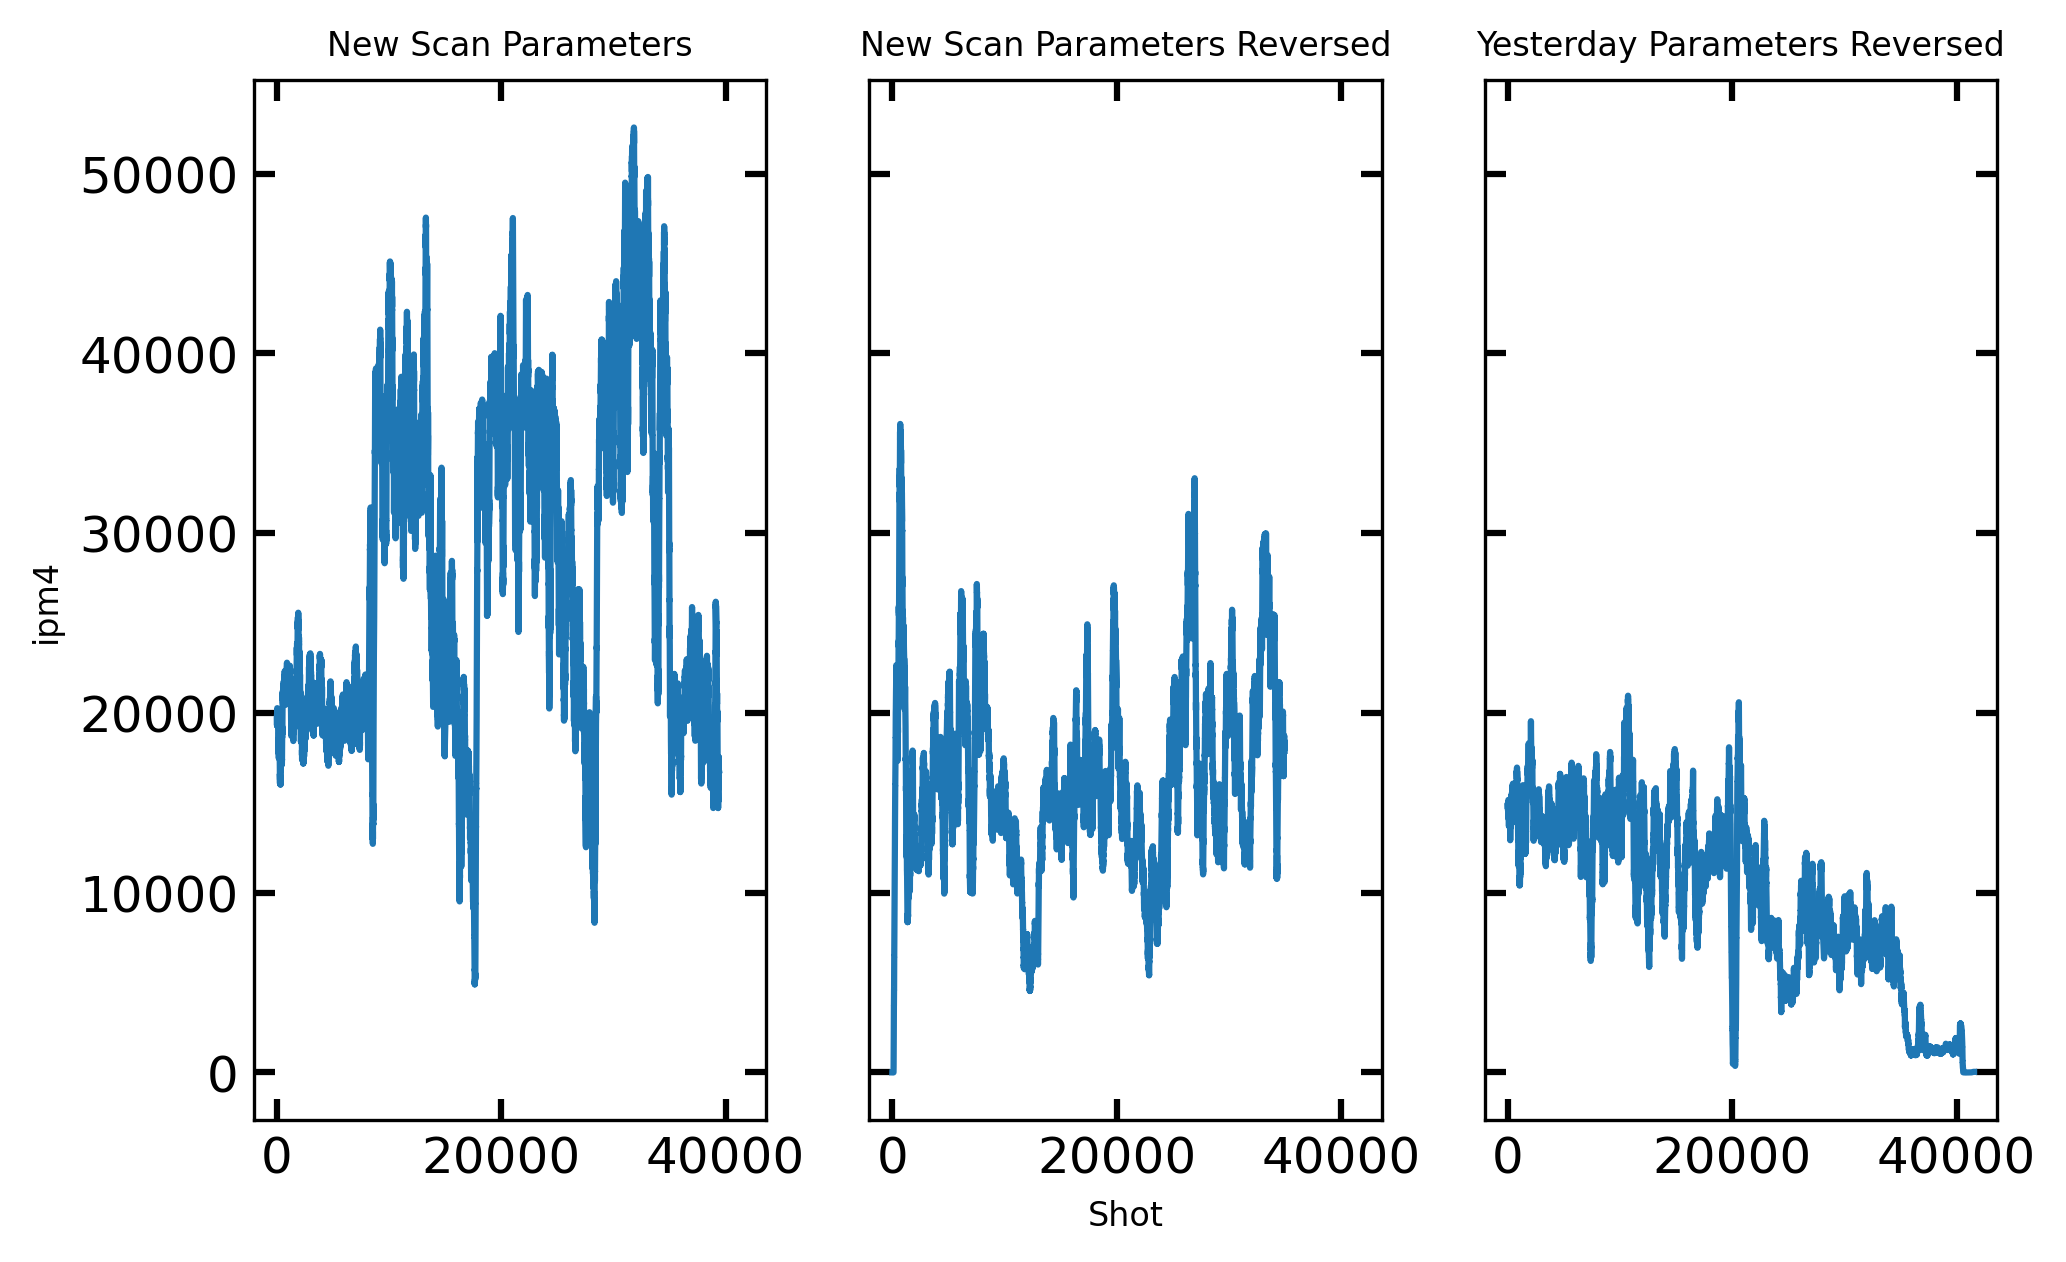

In [12]:
def moving_average(a, n=240,):
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
fig,axs=plt.subplots(1,3,sharey=True,sharex=True,dpi=300)
axs[0].plot(moving_average(ipm_92))
axs[0].set_title('New Scan Parameters',fontsize=8)
axs[0].set_ylabel('ipm4',fontsize=8)
axs[1].plot(moving_average(ipm_93))
axs[1].set_title('New Scan Parameters Reversed',fontsize=8)
axs[1].set_xlabel('Shot',fontsize=8)
axs[2].plot(moving_average(ipm_85))
axs[2].set_title('Yesterday Parameters Reversed',fontsize=8)

In [28]:
gas_78=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0078.h5')[r'gas_detector/f_11_ENRC'])
gas_79=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0079.h5')[r'gas_detector/f_11_ENRC'])
gas_80=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0080.h5')[r'gas_detector/f_11_ENRC'])
gas_81=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0081.h5')[r'gas_detector/f_11_ENRC'])

gas_82=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0082.h5')[r'gas_detector/f_11_ENRC'])
gas_83=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0083.h5')[r'gas_detector/f_11_ENRC'])
gas_84=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0084.h5')[r'gas_detector/f_11_ENRC'])
gas_85=np.array(h5py.File('/sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0085.h5')[r'gas_detector/f_11_ENRC'])
#plt.plot(np.array(fh[r'gas_detector/f_11_ENRC']))

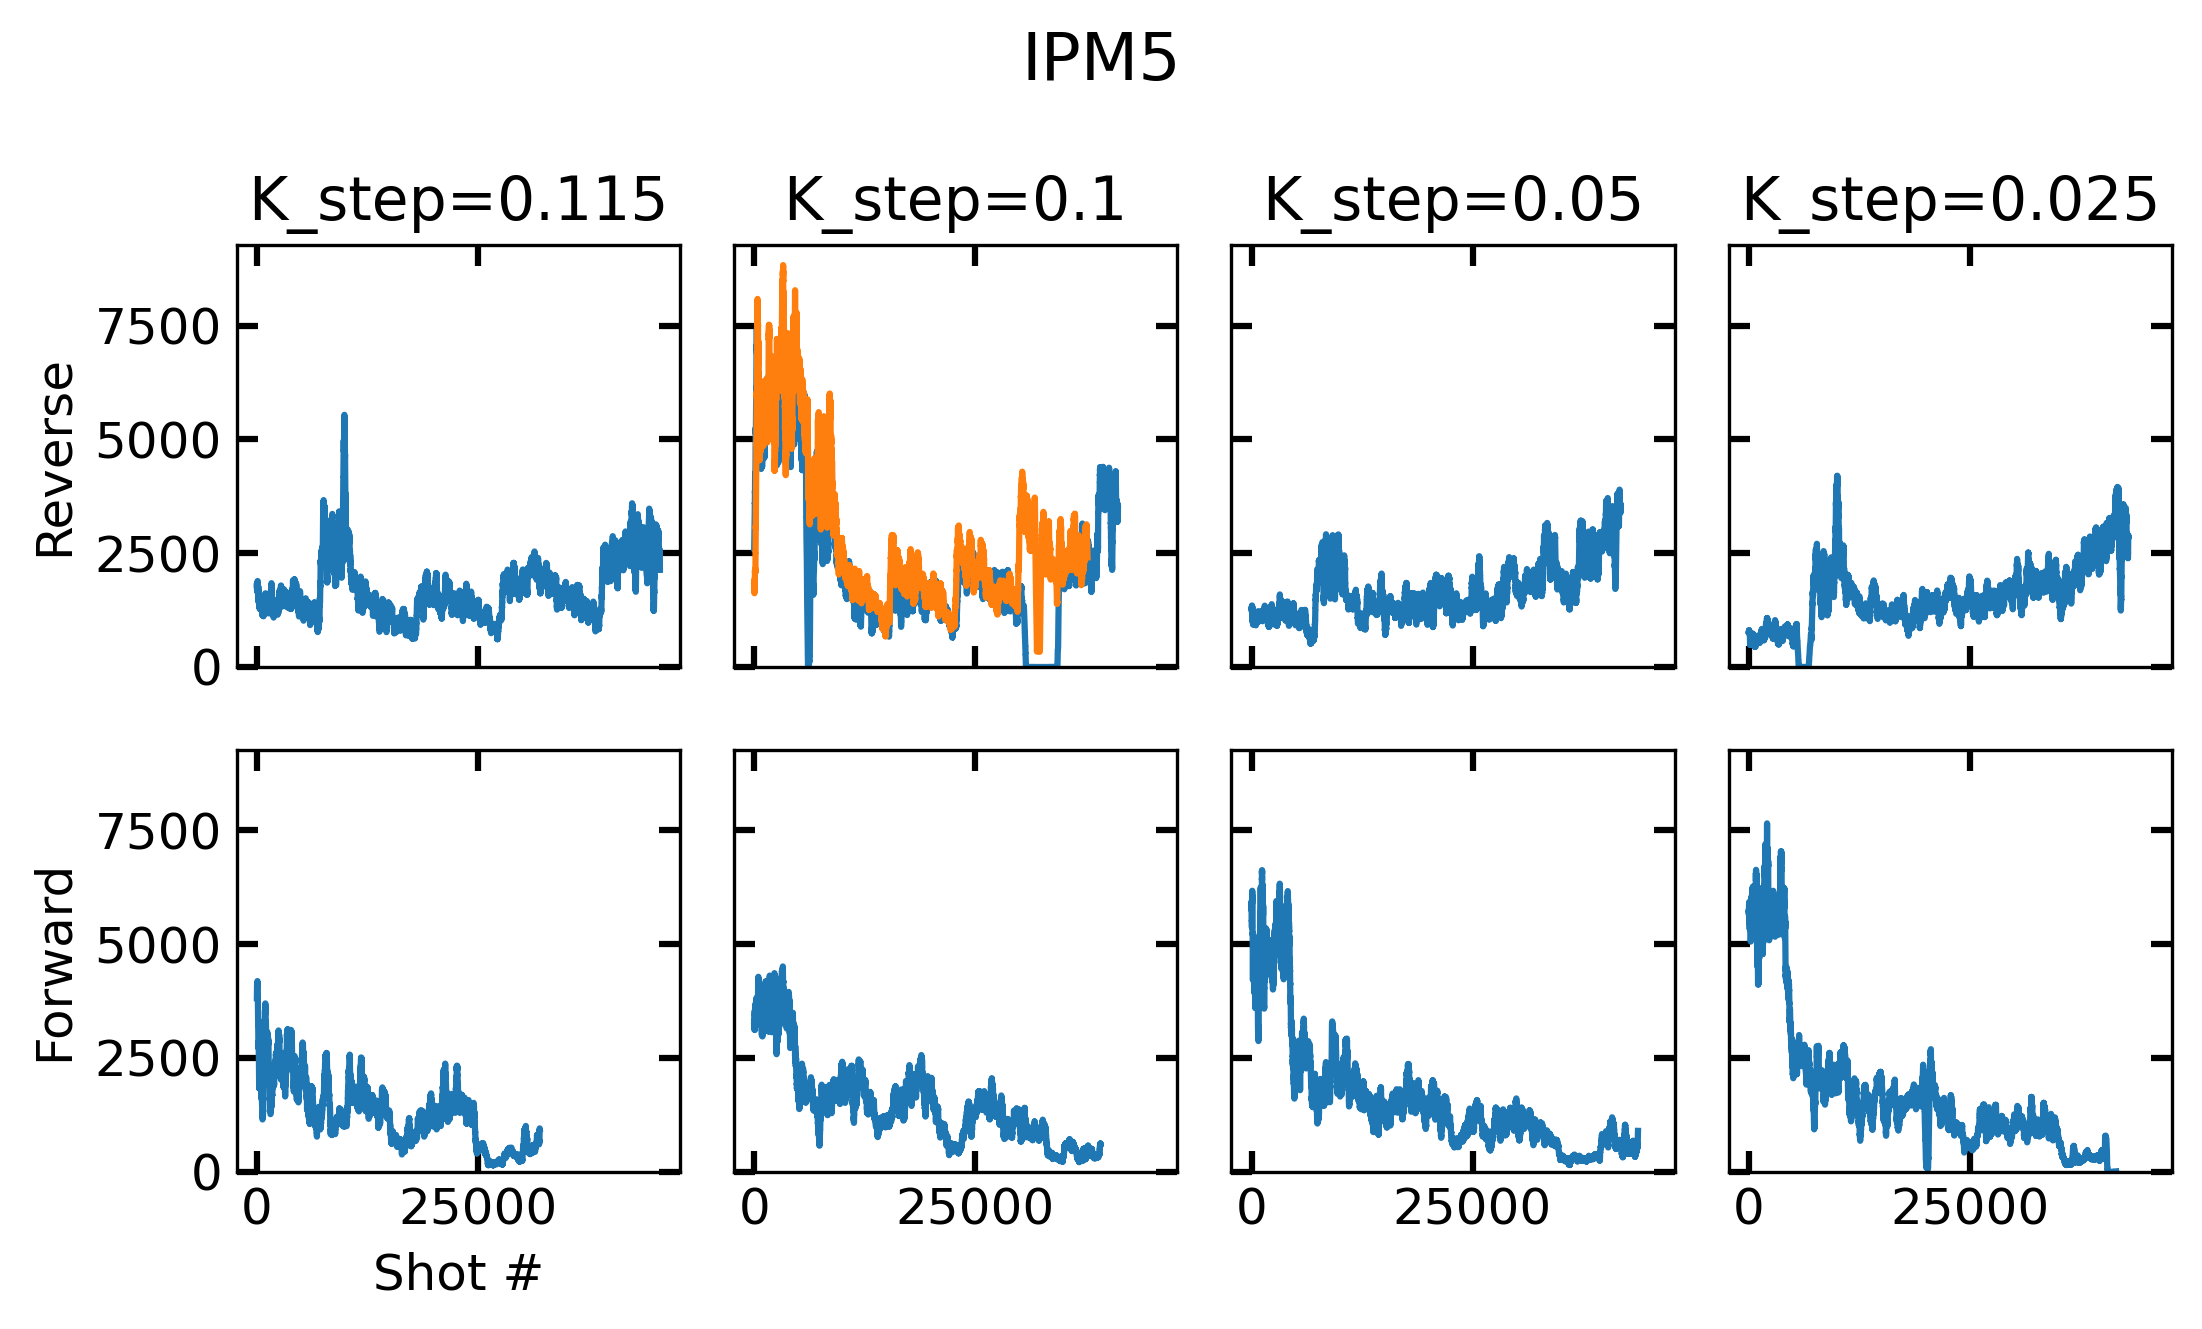

In [35]:
def moving_average(a, n=240,):
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
fig,axs=plt.subplots(2,4,sharey=True,sharex=True,dpi=300)
axs[0,0].plot(moving_average(ipm_81))
axs[0,1].plot(moving_average(ipm_78))
axs[0,1].plot(moving_average(ipm_77))
axs[0,2].plot(moving_average(ipm_79))
axs[0,3].plot(moving_average(ipm_80))


axs[1,0].plot(moving_average(ipm_82))
axs[1,1].plot(moving_average(ipm_83))
axs[1,2].plot(moving_average(ipm_84))
axs[1,3].plot(moving_average(ipm_85))
#axs[1,2].plot(moving_average(ipm_79))
#axs[1,3].plot(moving_average(ipm_80))
#axs[0,2].plot(moving_average(ipm_80))

#axs[1,0].plot(ipm_76_xpos)

axs[0,0].set_ylabel('Reverse')
axs[1,0].set_ylabel('Forward')
axs[0,0].set_title('K_step=0.115')
axs[0,1].set_title('K_step=0.1')
axs[0,2].set_title('K_step=0.05')
axs[0,3].set_title('K_step=0.025')
#axs[0,2].set_title('K_step=0.0125')
axs[-1,0].set_xlabel('Shot #')
for i in axs:
    for j in i:
        j.set_ylim(bottom=0)
fig.suptitle('IPM5', fontsize=16)
        
plt.tight_layout()

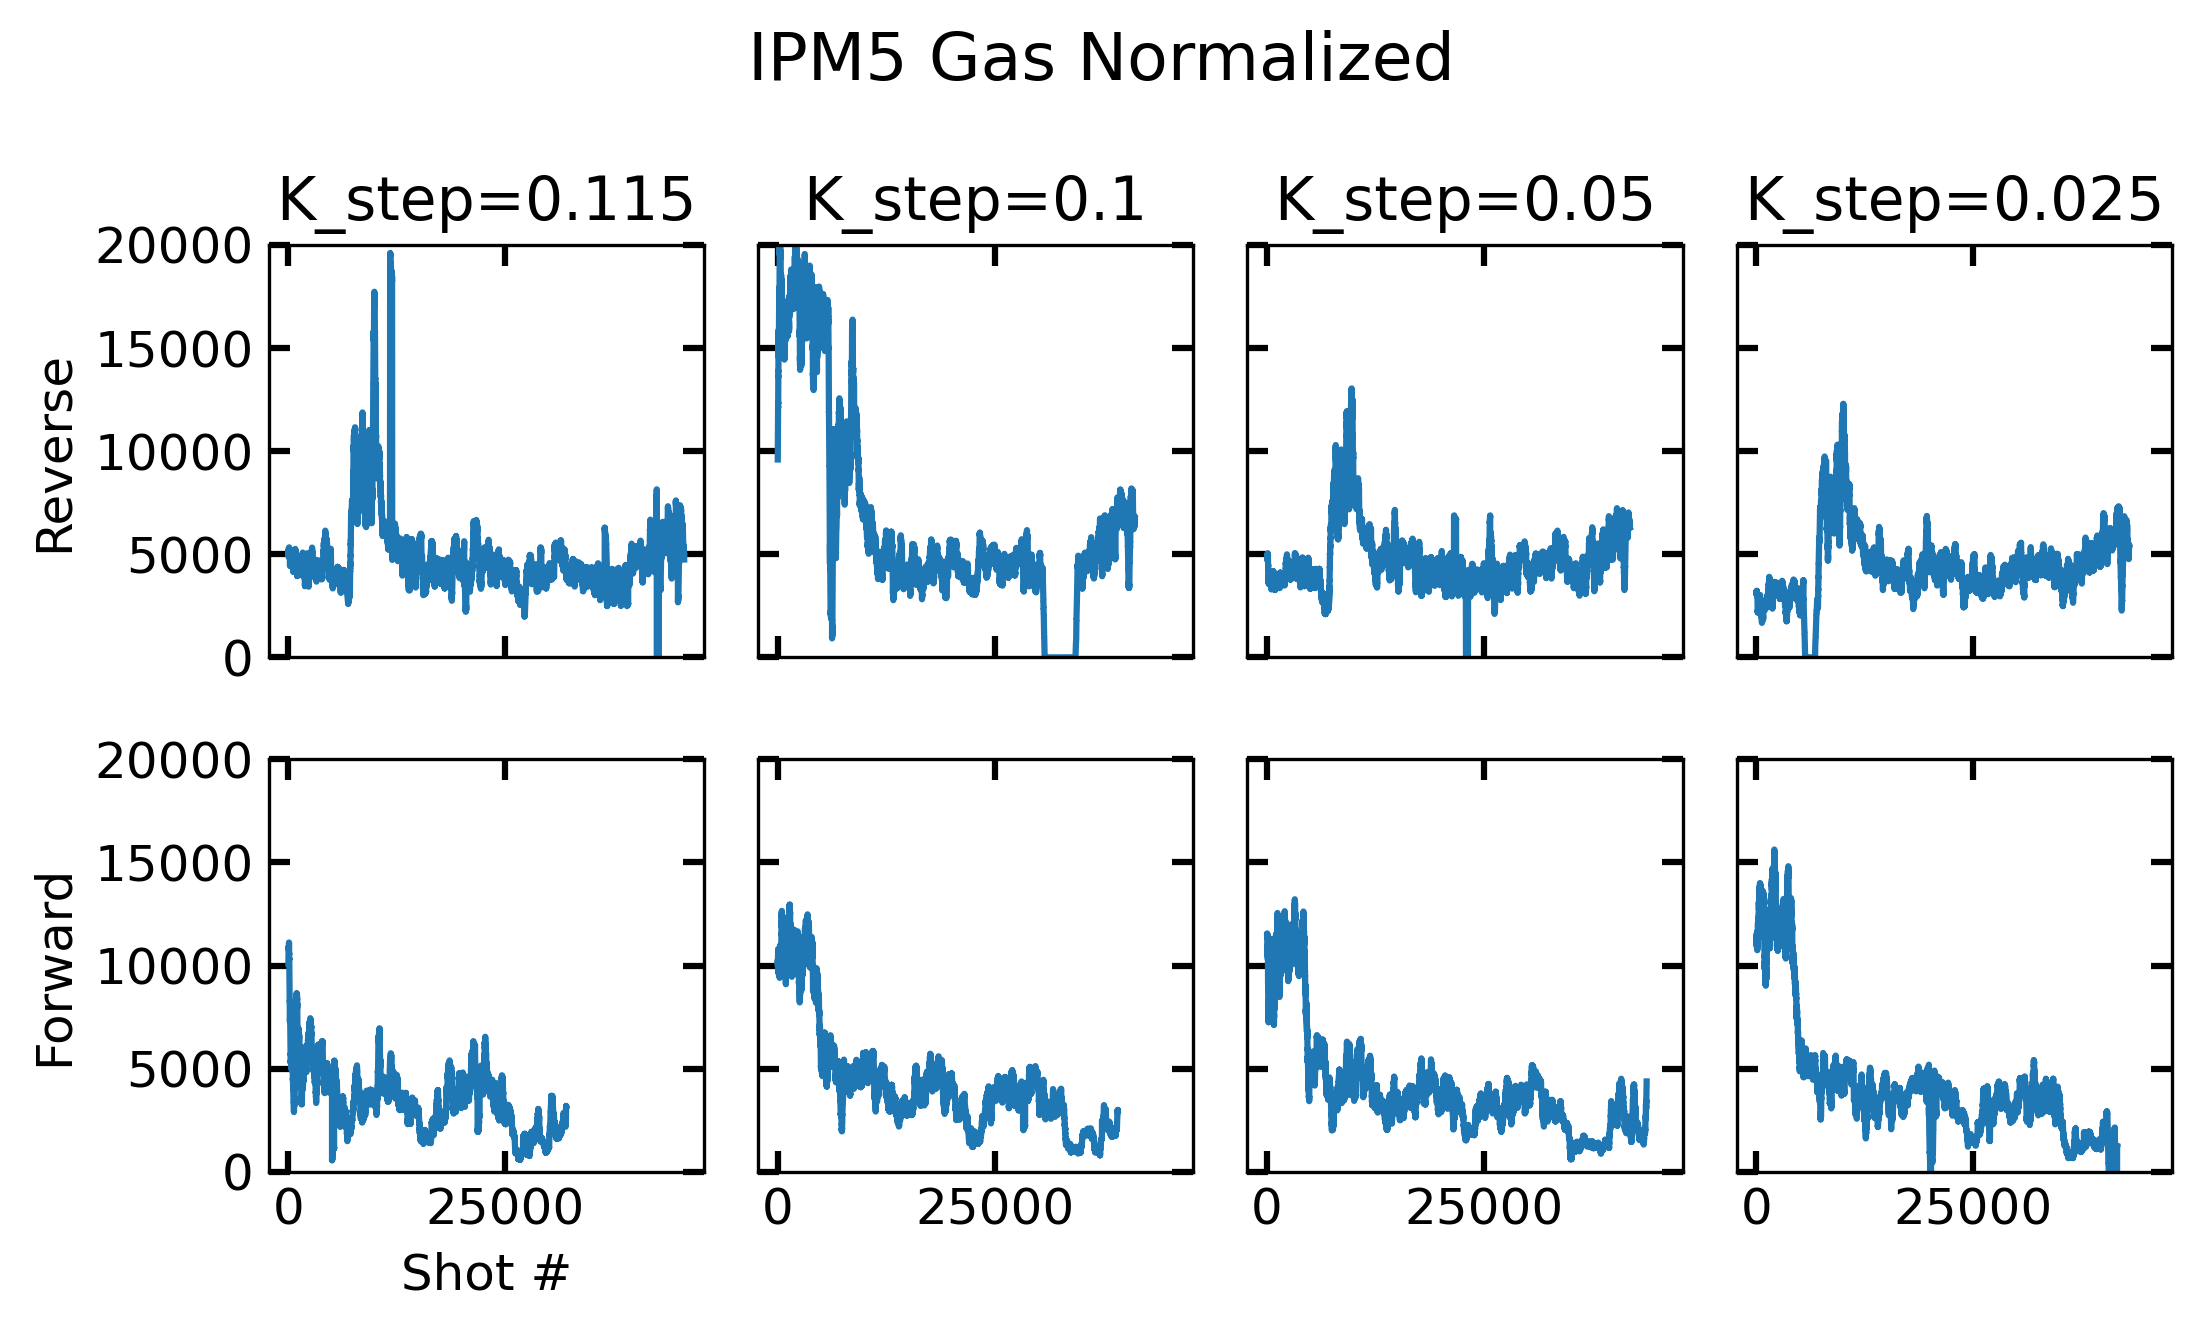

In [34]:
def moving_average(a, n=240,):
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
fig,axs=plt.subplots(2,4,sharey=True,sharex=True,dpi=300)
axs[0,0].plot(moving_average(ipm_81/gas_81))
axs[0,1].plot(moving_average(ipm_78/gas_78))
axs[0,2].plot(moving_average(ipm_79/gas_79))
axs[0,3].plot(moving_average(ipm_80/gas_80))


axs[1,0].plot(moving_average(ipm_82/gas_82))
axs[1,1].plot(moving_average(ipm_83/gas_83))
axs[1,2].plot(moving_average(ipm_84/gas_84))
axs[1,3].plot(moving_average(ipm_85/gas_85))
#axs[1,2].plot(moving_average(ipm_79))
#axs[1,3].plot(moving_average(ipm_80))
#axs[0,2].plot(moving_average(ipm_80))

#axs[1,0].plot(ipm_76_xpos)

axs[0,0].set_ylabel('Reverse')
axs[1,0].set_ylabel('Forward')
axs[0,0].set_title('K_step=0.115')
axs[0,1].set_title('K_step=0.1')
axs[0,2].set_title('K_step=0.05')
axs[0,3].set_title('K_step=0.025')
#axs[0,2].set_title('K_step=0.0125')
axs[-1,0].set_xlabel('Shot #')
for i in axs:
    for j in i:
        j.set_ylim(bottom=0)
        j.set_ylim(top=2E4)
fig.suptitle('IPM5 Gas Normalized', fontsize=16)
plt.tight_layout()

# plt.plot(moving_average(ipm_76_xpos))

In [173]:
np.shape(np.argmax(fh['feeBld/hproj'],axis=1))

(60171,)

In [222]:
fh['epics'].keys()

<KeysViewHDF5 ['att_T', 'att_T3rd', 'ccm_E', 'diff_chis', 'diff_dety', 'diff_phis', 'diff_th', 'diff_tth', 'diff_x', 'diff_xs', 'diff_y', 'diff_ys', 'diff_zs', 'ladm_theta', 'lam_det_x', 'lam_det_y', 'lam_x1', 'lam_x2', 'lam_y1', 'lam_y2', 'lam_z', 'las_drift_correction', 'lxe', 'lxt', 'lxt_ttc', 'lxt_vitara']>

(-30.0, 50.0)

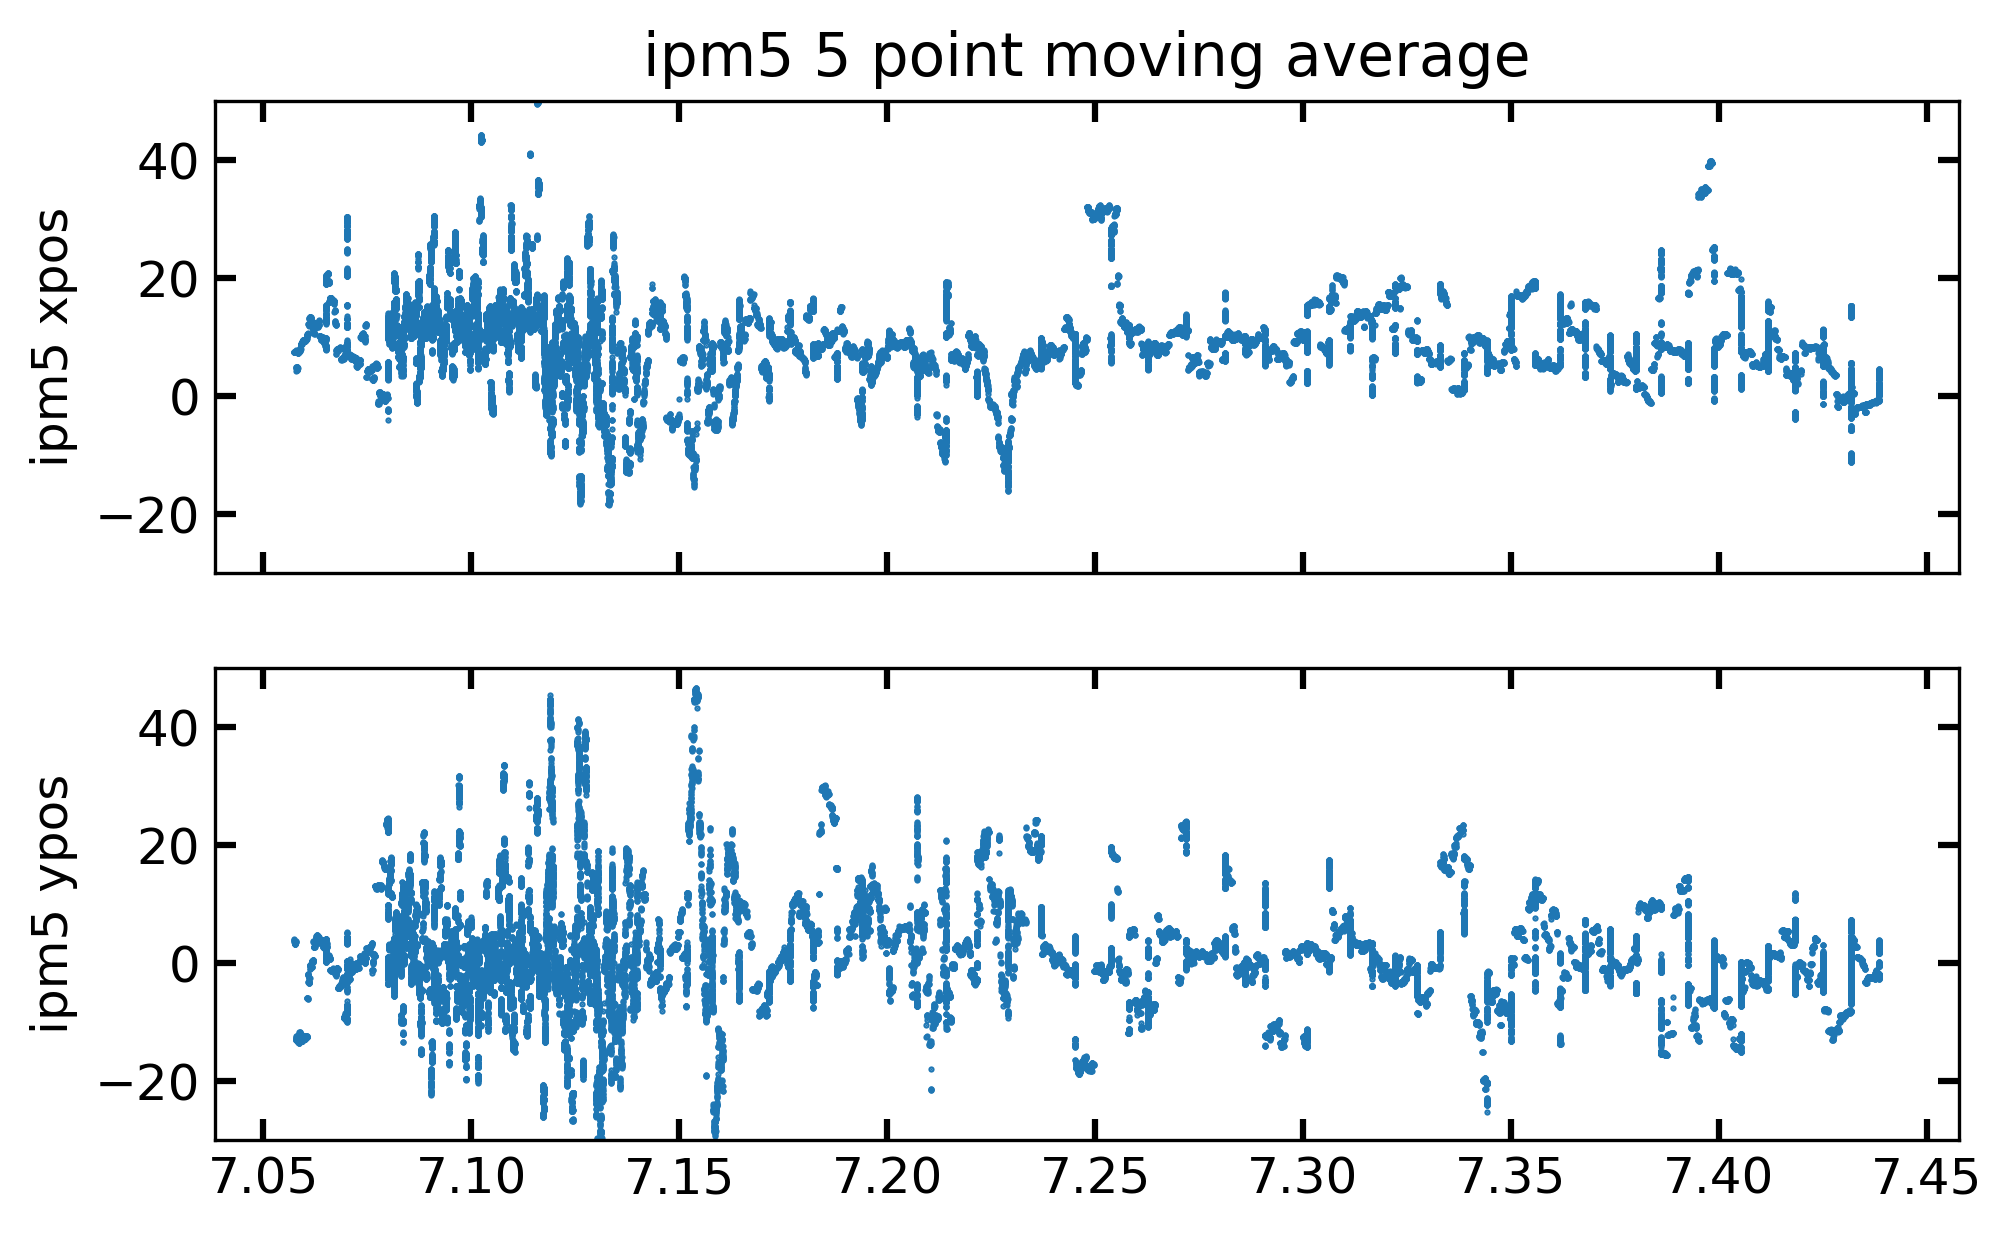

In [208]:
import numpy as np
def moving_average(a, n=240,):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
fig,axs=plt.subplots(2,dpi=300,sharex=True,sharey=True)

axs[0].plot(moving_average(np.array(fh['epicsUser/ccm_E_setpoint'])),moving_average(np.array(fh['ipm5/xpos'])),'.',markersize=1)
axs[0].set_ylabel('ipm5 xpos')
axs[0].set_title('ipm5 5 point moving average')
axs[1].plot(moving_average(np.array(fh['epicsUser/ccm_E_setpoint'])),moving_average(np.array(fh['ipm5/ypos'])),'.',markersize=1)
axs[1].set_ylabel('ipm5 ypos')

plt.ylim(-30,50)

(-30.0, 50.0)

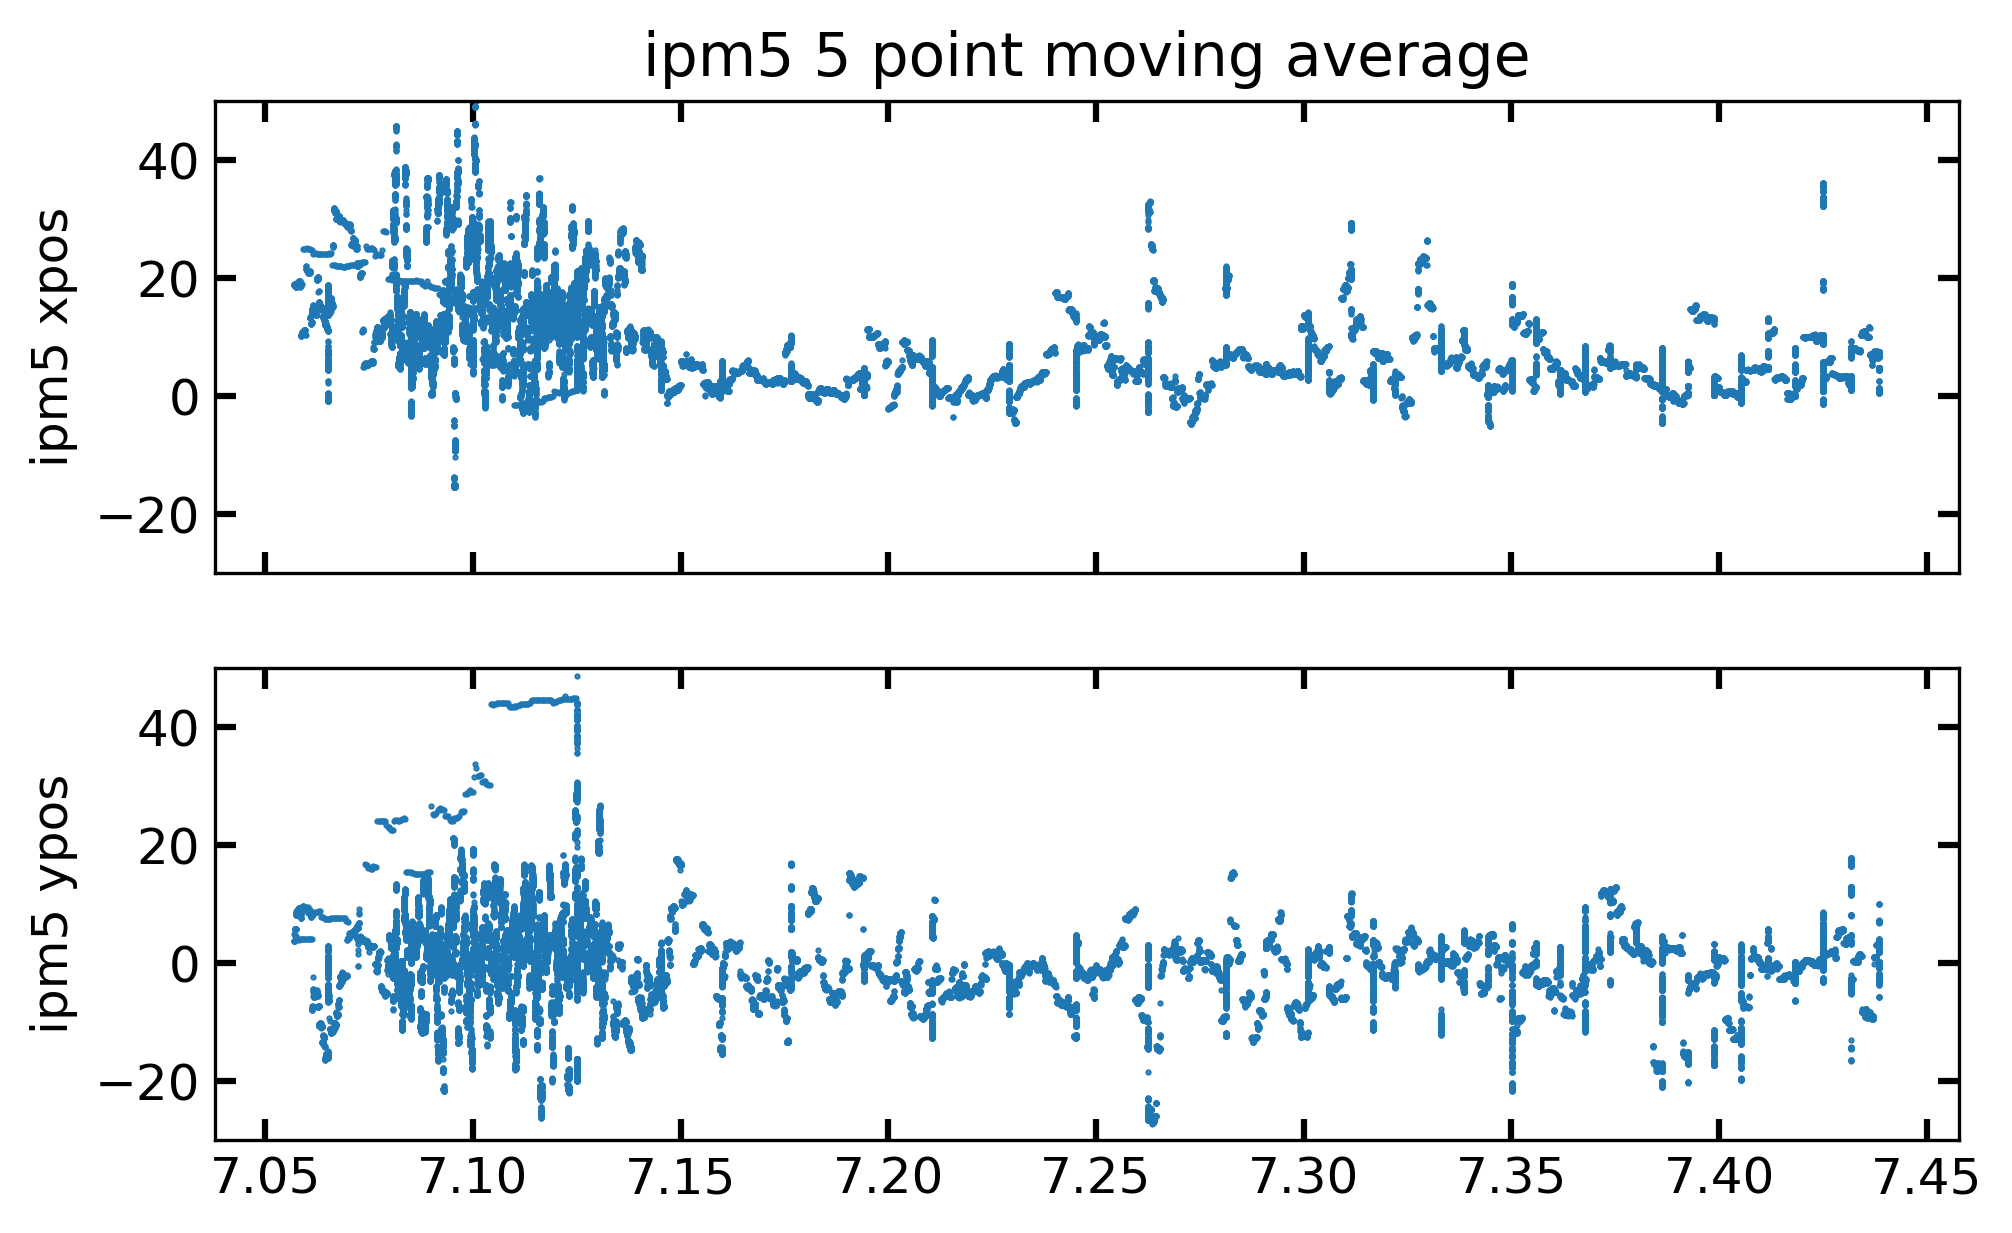

In [206]:
import numpy as np
def moving_average(a, n=240,):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
fig,axs=plt.subplots(2,dpi=300,sharex=True,sharey=True)

axs[0].plot(moving_average(np.array(fh['epicsUser/ccm_E_setpoint'])),moving_average(np.array(fh['ipm5/xpos'])),'.',markersize=1)
axs[0].set_ylabel('ipm5 xpos')
axs[0].set_title('ipm5 5 point moving average')
axs[1].plot(moving_average(np.array(fh['epicsUser/ccm_E_setpoint'])),moving_average(np.array(fh['ipm5/ypos'])),'.',markersize=1)
axs[1].set_ylabel('ipm5 ypos')

plt.ylim(-30,50)

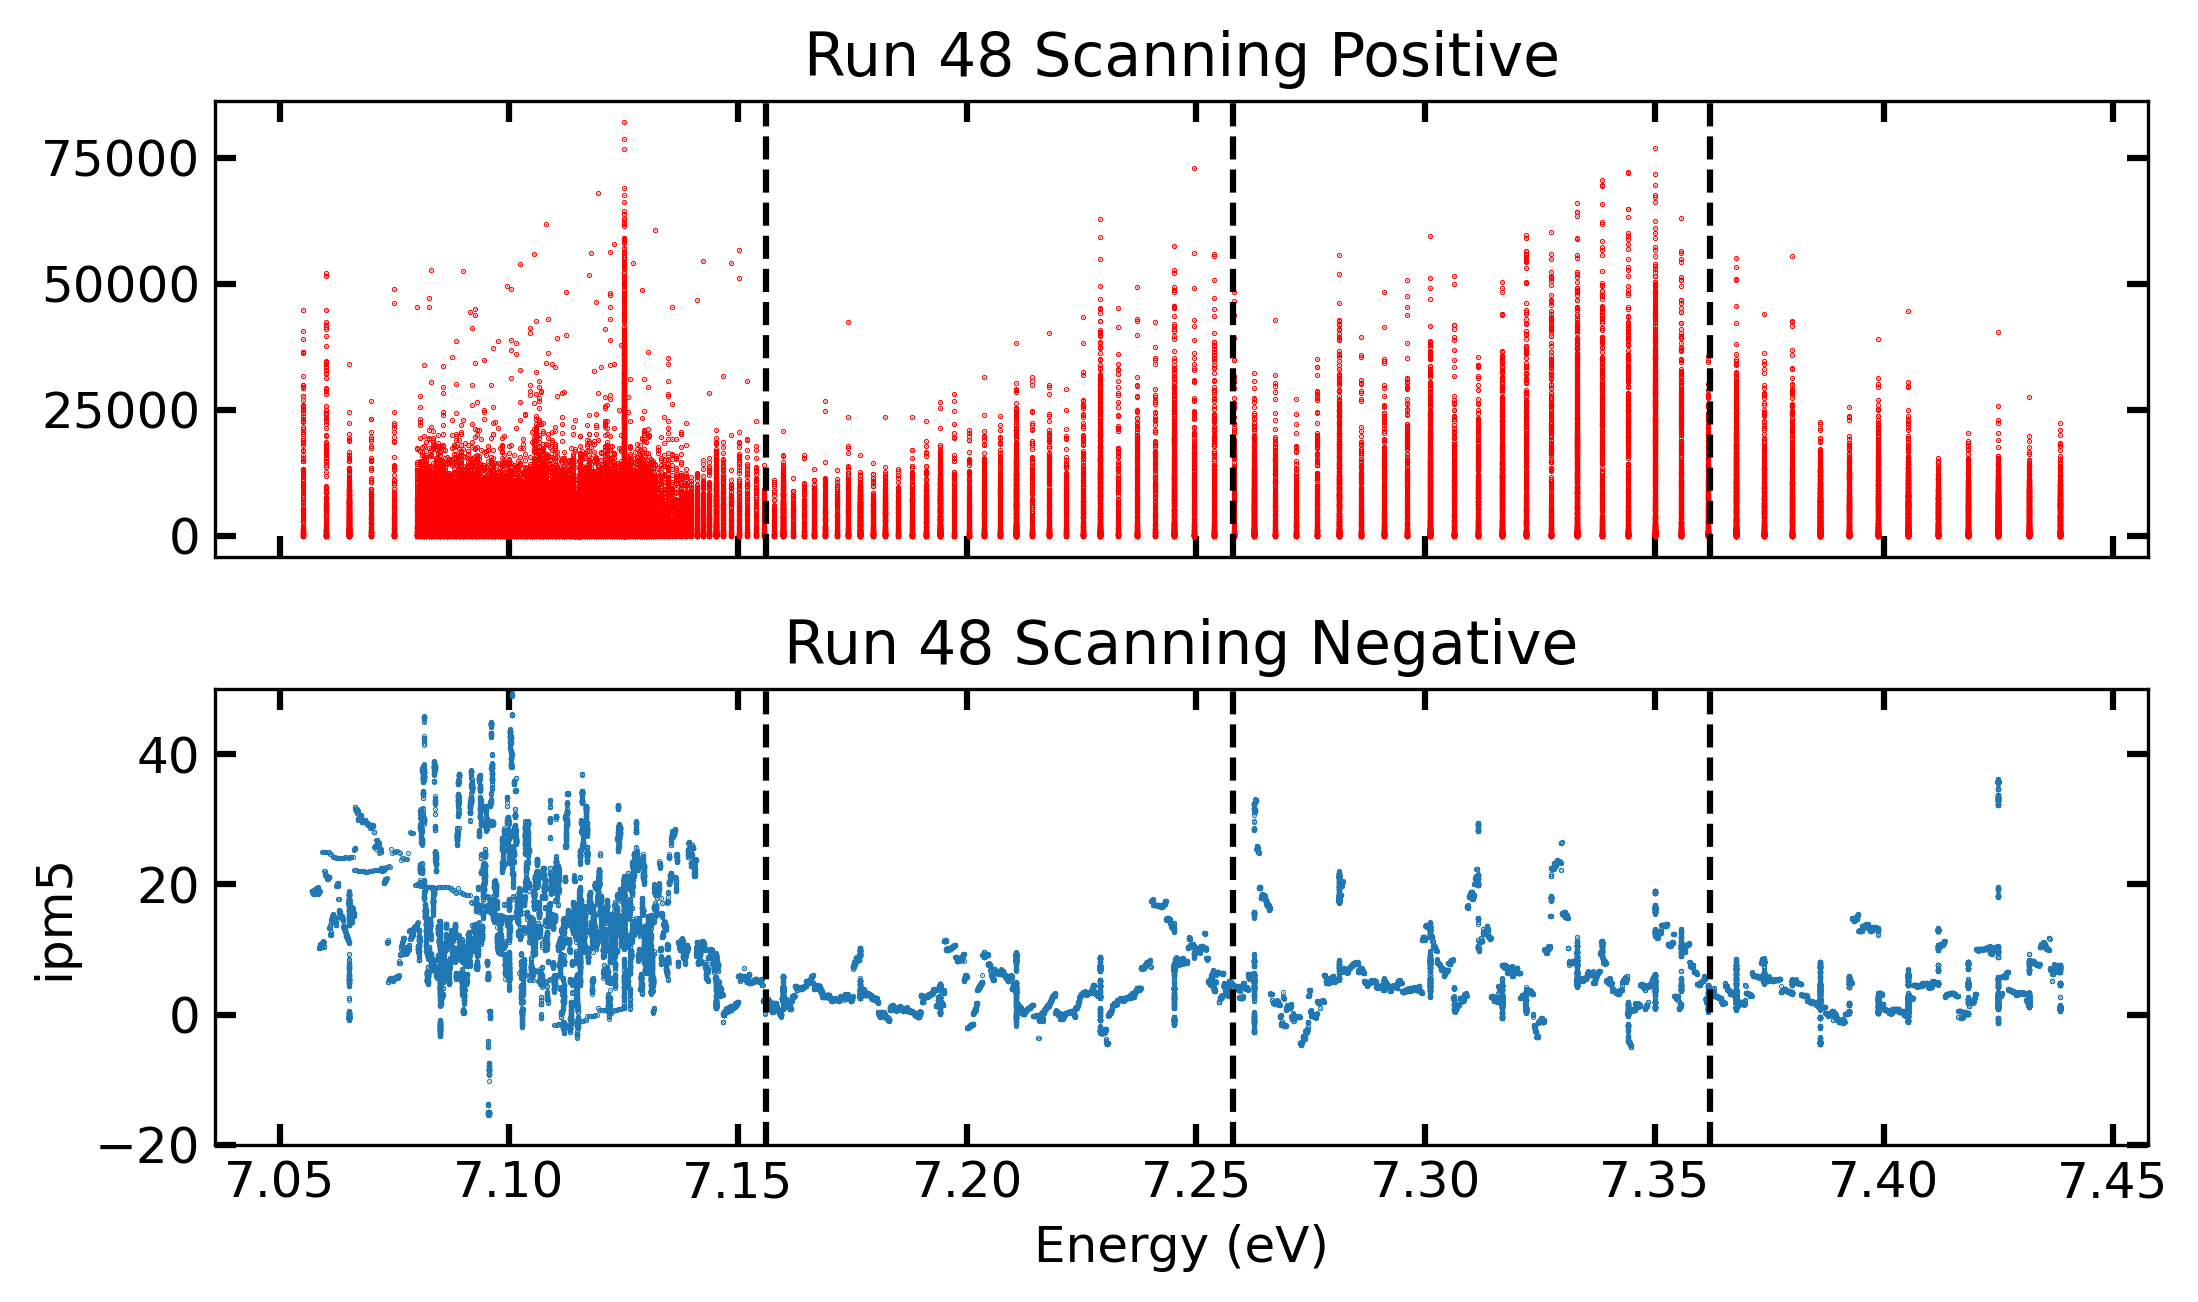

In [223]:
fig,axs=plt.subplots(2,1,sharex=True,dpi=300)
axs[0].plot(xas.analyzed_runs[0].ccm_E_setpoint,xas.analyzed_runs[0].ipm5,'r.',markersize=0.5)
axs[0].set_title('Run 48 Scanning Positive')
#lines=[1500,31700,40900,50400]
lines=[7.156,7.258,7.362]
for line in lines:axs[0].axvline(line,color='k',linestyle='--')


axs[1].plot(moving_average(xas.analyzed_runs[0].ccm_E_setpoint),moving_average(xas.analyzed_runs[0].ipm5_xpos),'.',markersize=0.5)
#lines=[14000,23800,36500]
lines=[7.156,7.258,7.362]
for line in lines:axs[1].axvline(line,color='k',linestyle='--')
axs[1].set_title('Run 48 Scanning Negative')
axs[1].set_ylabel('ipm5')

axs[1].set_ylim(-20,50)
axs[1].set_xlabel('Energy (eV)')
plt.tight_layout()
#plt.savefig('ipm_plot_ccm.png')

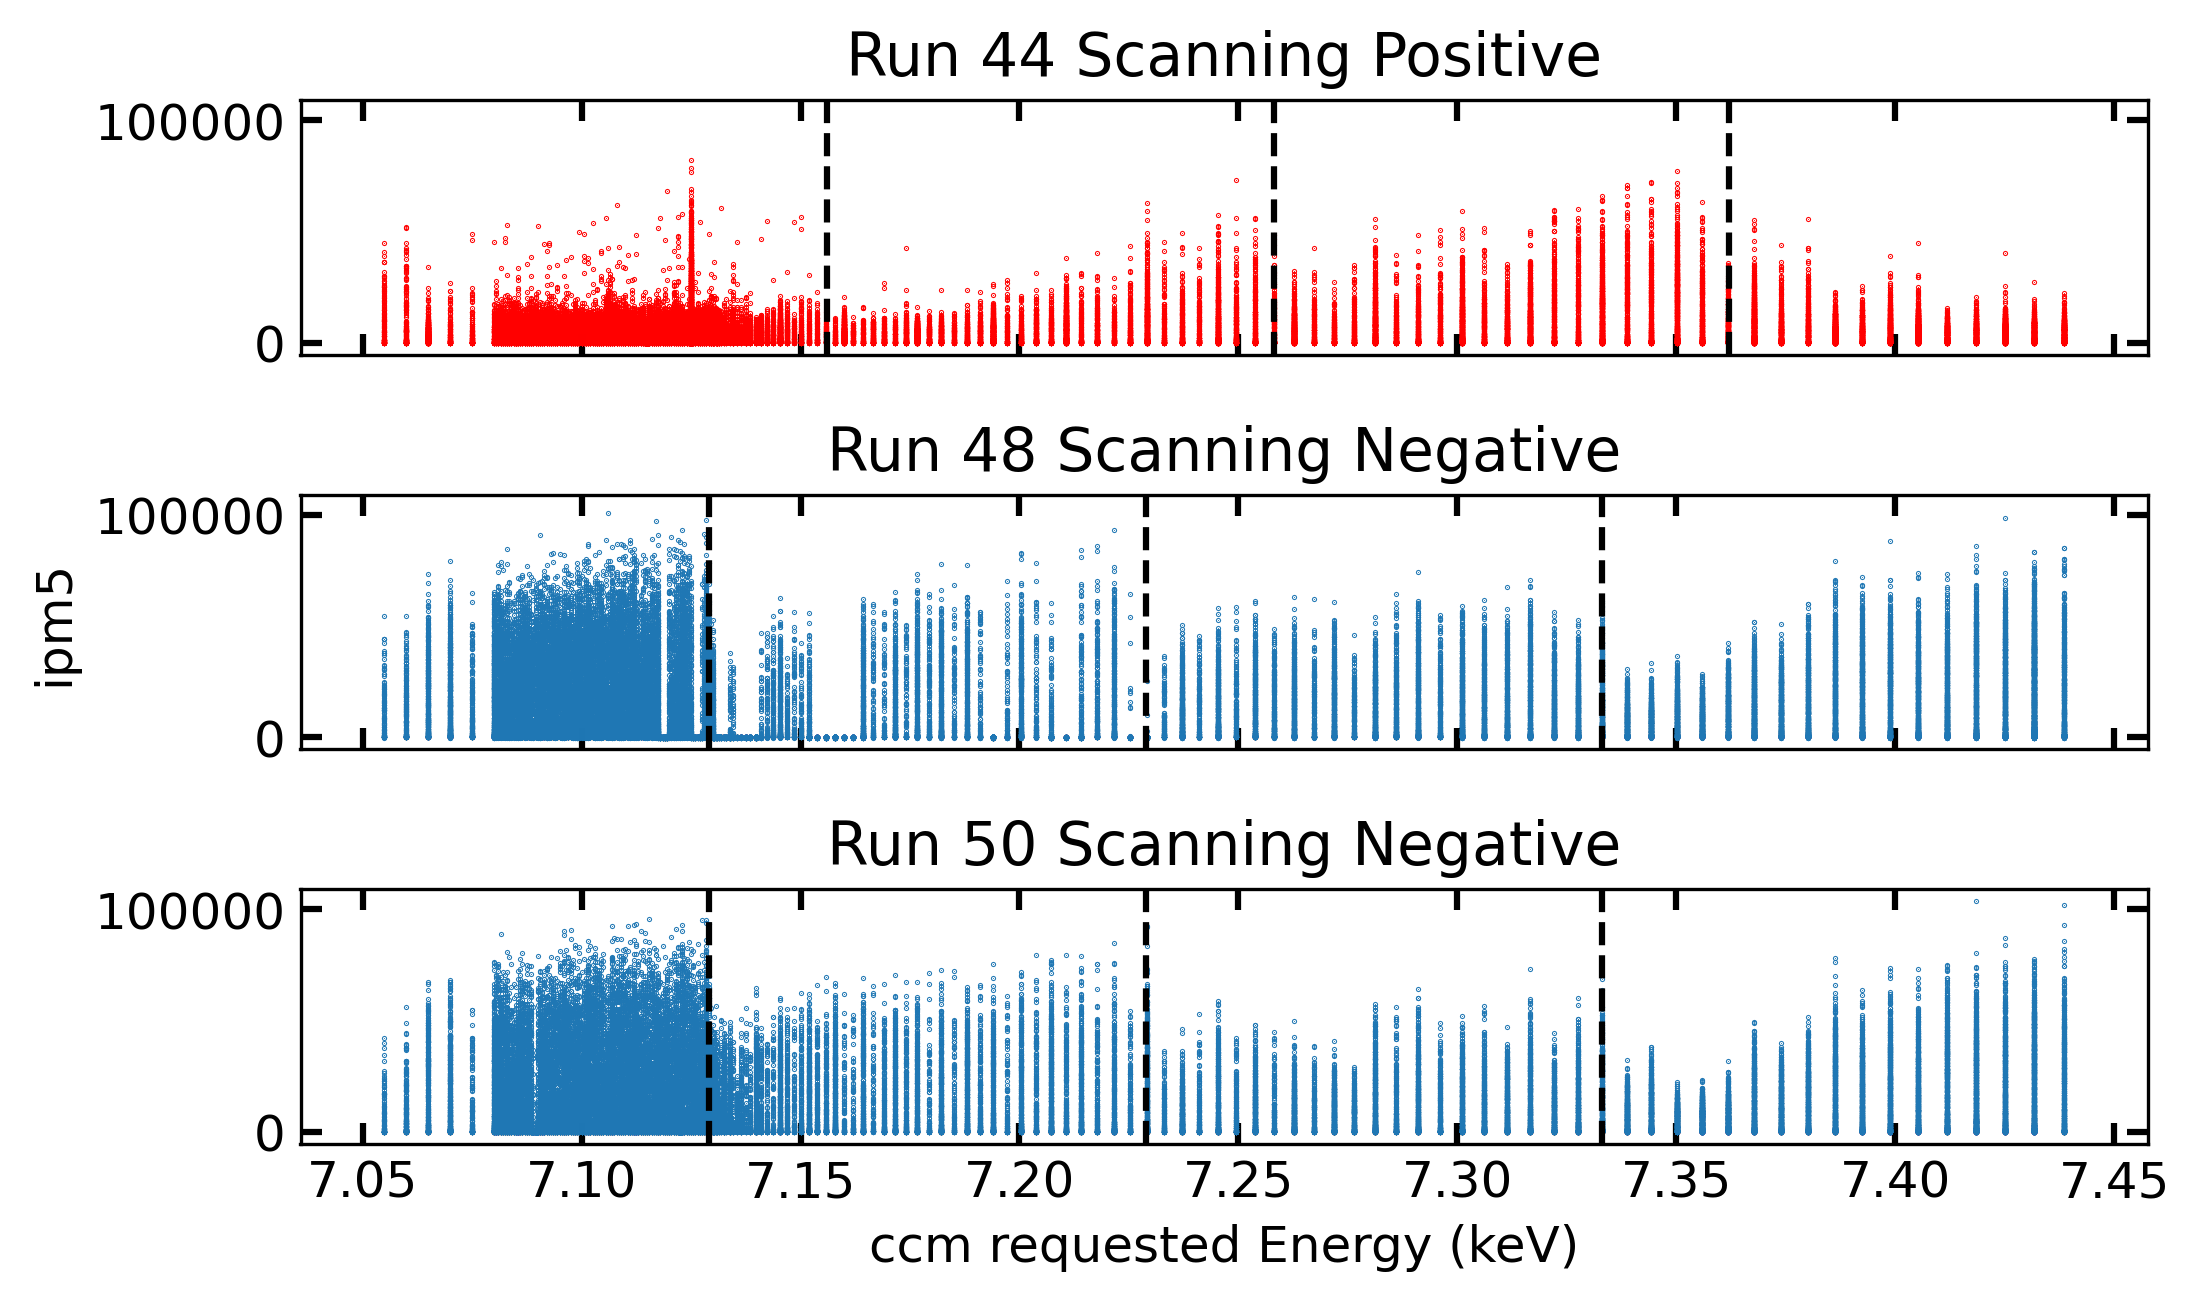

In [161]:
fig,axs=plt.subplots(3,1,sharey=True,sharex=True,dpi=300)
axs[0].plot(xas.analyzed_runs[0].ccm_E_setpoint,xas.analyzed_runs[0].ipm5,'r.',markersize=0.5)
axs[0].set_title('Run 44 Scanning Positive')
#lines=[1500,31700,40900,50400]
lines=[7.156,7.258,7.362]
for line in lines:axs[0].axvline(line,color='k',linestyle='--')


axs[1].plot(xas.analyzed_runs[1].ccm_E_setpoint,xas.analyzed_runs[1].ipm5,'.',markersize=0.5)
#lines=[14000,23800,36500]
lines=[7.129,7.229,7.333]
for line in lines:axs[1].axvline(line,color='k',linestyle='--')
axs[1].set_title('Run 48 Scanning Negative')
axs[1].set_ylabel('ipm5')
axs[2].plot(xas.analyzed_runs[2].ccm_E_setpoint,xas.analyzed_runs[2].ipm5,'.',markersize=0.5)
#lines=[13000,22700,35300]
lines=[7.129,7.229,7.333]
for line in lines:axs[2].axvline(line,color='k',linestyle='--')
axs[2].set_title('Run 50 Scanning Negative')
axs[2].set_xlabel('ccm requested Energy (keV)')

plt.tight_layout()
plt.savefig('ipm_plot_ccm.png')

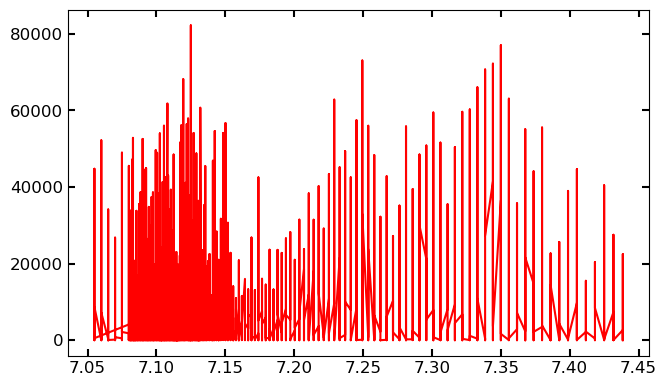

In [113]:
import XSpect.XSpect_Diagnostics as dt
plt.plot(xas.analyzed_runs[0].ccm_E_setpoint,xas.analyzed_runs[0].ipm5,color='r')


In [72]:
# run = 339
# exp = 'xcsc00121'


# keys=['epics/ccm_E','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_area'] 
# names=['ccm','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']

run = 66
exp = 'xcsx1008722'

keys=['epics/ccm_E','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm_dg2/sum','tt/AMPL','epix_2/ROI_0_area'] 
names=['ccm','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']

d = dt.diagnostics(run, exp, keys, names)
#plt.gca().set_title(f'Run {run} tt/AMPL Histogram')

Run 66 imported


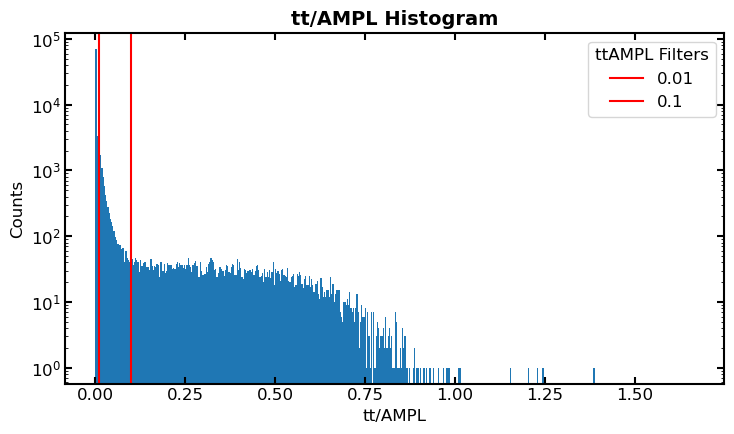

In [73]:
tt_thres = [0.01, 0.1]

d.ttAMPL_histogram(tt_thres)
#plt.gca().set_title(f'Run {run} tt/AMPL Histogram')

In [ ]:
plt.plot(xas.analyzed_runs[1].ipm)
plt.title('Run 49 Scanning Negative')

In [4]:
np.nan_to_num(xas.difference_spectrum[-1], nan=0.0, posinf=0.0, neginf=0.0)

array([ 1.04982415e-03,  5.81192113e-03,  5.00160619e-03,  2.95973055e-04,
       -6.36592383e-03, -3.53473862e-03,  0.00000000e+00, -5.03404365e-03,
        8.74021141e-03, -9.78069211e-03, -6.01950595e-04, -7.41222131e-04,
        3.11817647e-03,  3.07249931e-04,  3.53599440e-03, -5.41632497e-02,
        1.47523328e-03, -3.77760864e-03,  4.54649987e-04, -1.14612633e-03,
        1.63210602e-03, -3.52419524e-03,  7.50824153e-03,  1.61508247e-03,
        1.46822277e-02, -1.57554031e-03, -5.49894914e-03, -1.41619672e-02,
        5.97346760e-03,  1.36009187e-02,  3.02554164e-03,  7.56782878e-03,
       -2.55642824e-04, -2.43229131e-03,  6.52098509e-03, -1.04871628e-03,
       -1.04879440e-02,  5.88491010e-03,  2.89019174e-04, -1.13764930e-01,
        9.61235101e-03, -2.23309952e-03,  1.23975914e-01,  1.92448004e-03,
       -5.60143633e-03, -1.47386422e-03,  3.25610771e-01, -2.08988558e-03,
        5.19021483e-03, -1.10633884e-02,  5.00078146e-03, -8.55920028e-03,
        7.67891124e-03, -

Text(0.5, 1.0, 'Run 64')

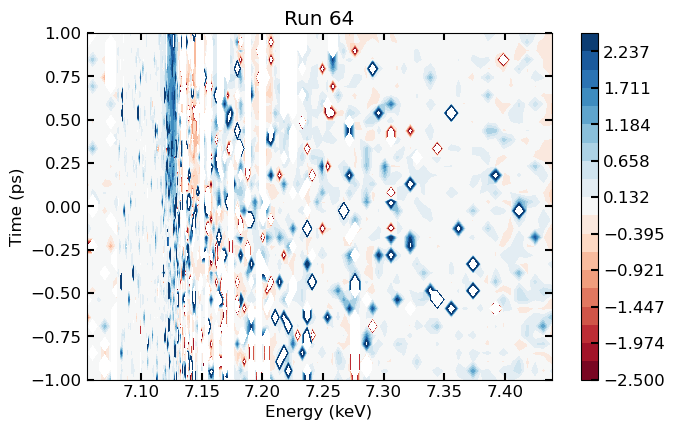

In [10]:
v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas, 
                  xas_laser_key='epix_simultaneous_laser_time_energy_binned',
                  xas_key='epix_xray_not_laser_time_energy_binned',
                  norm_laser_key='ipm_simultaneous_laser_time_energy_binned',
                  norm_key='ipm_xray_not_laser_time_energy_binned',interpolate=False)


v.plot_2d_difference_spectrum(xas,vmin=-5,vmax=5)
plt.gca().set_title('Run 64')

#plt.axvline(7.1245, color = 'r')

Text(0.5, 1.0, 'Energy traces')

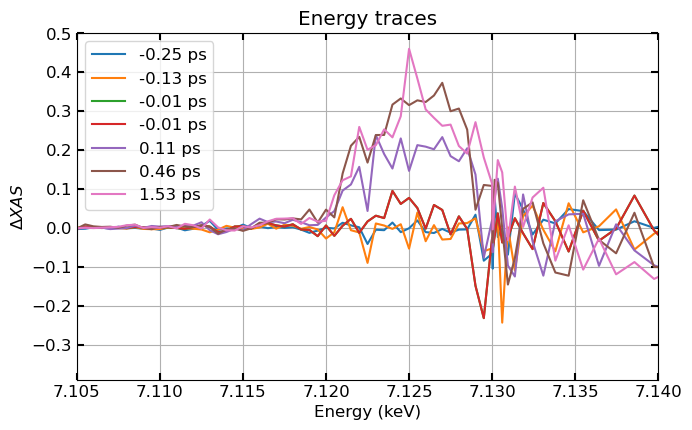

In [18]:
tlist = [-0.4, -0.1, -0.06, -0.02, 0.1, 0.5, 1.5]
# tlist = [-2, 0, 5, 20, 40]
leglist = []
for ii in tlist:
    b = np.min(np.abs(xas.time_bins-ii))
    indx = np.argmin(np.abs(xas.time_bins-ii))
    plt.plot(xas.ccm_bins, xas.difference_spectrum[indx,:])
    leglist.append('{} ps'.format(np.round(xas.time_bins[indx], decimals = 2)))
plt.legend(leglist)
plt.grid()
plt.xlim(7.105,7.140)
#plt.ylim(-0.1,0.1)
plt.xlabel('Energy (keV)')
plt.ylabel(r'$\Delta XAS$')
plt.title('Energy traces')
#plt.axvline(7.1145, color='r')

In [87]:
np.shape(xas.summed_laser_on/xas.summed_norm_on)

/lscratch/lbgee/tmp/ipykernel_407632/1248724353.py:1: RuntimeWarning: invalid value encountered in divide
  np.shape(xas.summed_laser_on/xas.summed_norm_on)


(40, 212)

In [94]:
on=np.nanmean(xas.summed_laser_on/xas.summed_norm_on,axis=0)
off=np.nanmean(xas.summed_laser_off/xas.summed_norm_off,axis=0)
plt.plot(xas.ccm_bins,np.nanmean(xas.summed_laser_off/xas.summed_norm_off,axis=0))
plt.plot(xas.ccm_bins,np.nanmean(xas.summed_laser_on/xas.summed_norm_on,axis=0))
plt.legend(['Laseroff','Laseron'])
plt.title('Delta XAS EXAFS Run 44+48')
#plt.xlim(7.105,7.155)

AttributeError: 'XASBatchAnalysis' object has no attribute 'summed_laser_on'

/lscratch/lbgee/tmp/ipykernel_3514452/1025071998.py:1: RuntimeWarning: invalid value encountered in divide
  on=np.nanmean(xas.summed_laser_off/xas.summed_norm_off,axis=0)
/lscratch/lbgee/tmp/ipykernel_3514452/1025071998.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(xas.ccm_bins,np.nanmean(xas.summed_laser_off/xas.summed_norm_off,axis=0))


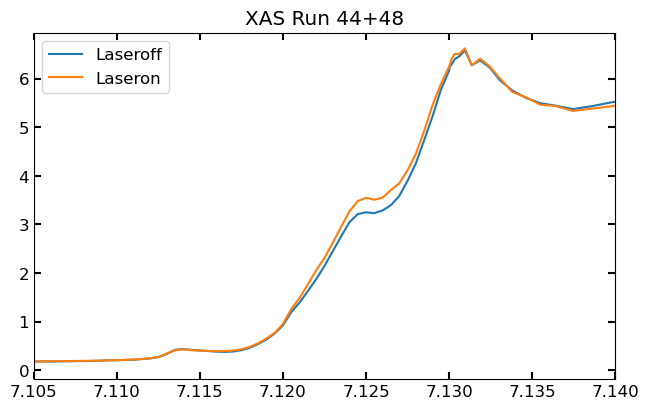

In [13]:
on=np.nanmean(xas.summed_laser_off/xas.summed_norm_off,axis=0)
off=np.nanmean(xas.summed_laser_on/xas.summed_norm_on,axis=0)
plt.plot(xas.ccm_bins,np.nanmean(xas.summed_laser_off/xas.summed_norm_off,axis=0))
plt.plot(xas.ccm_bins,np.nanmean(xas.summed_laser_on/xas.summed_norm_on,axis=0))
plt.legend(['Laseroff','Laseron'])
plt.xlim(7.105,7.14)
plt.title('XAS Run 44+48')
idx_cut=np.argmin(np.abs(xas.ccm_bins-7.462))
np.savetxt('off.txt',np.column_stack([xas.ccm_bins[:idx_cut]*1000,off[:idx_cut]]))

In [12]:
len(xas.ccm_bins)

212

In [111]:
arg_7130=np.argmin(np.abs(xas.ccm_bins-7.130))

Text(0.5, 0, 'K')

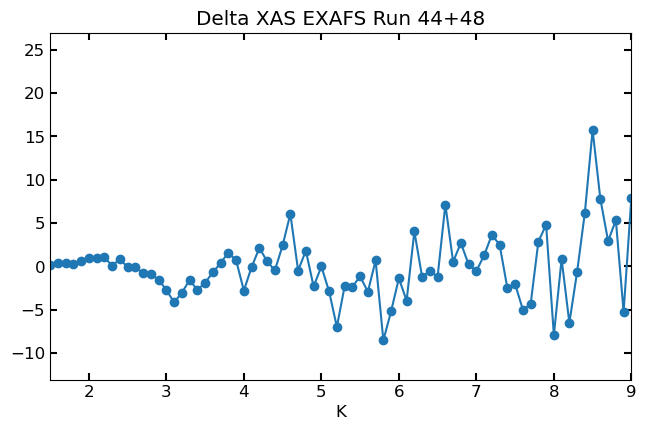

In [117]:
k=eV_to_K(xas.ccm_bins[arg_7130:])
plt.plot(k,(on-off)[arg_7130:]*k**3,'o-')
plt.xlim(1.5,9)
plt.title('Delta XAS EXAFS Run 44+48')
plt.xlabel('K')

Text(0.5, 0, 'K')

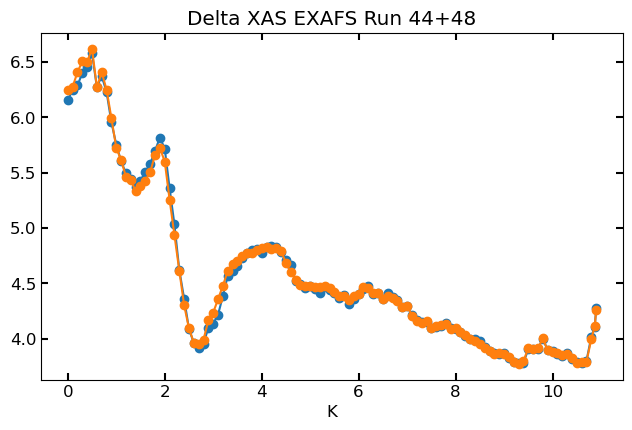

In [120]:
k=eV_to_K(xas.ccm_bins[arg_7130:])
plt.plot(k,on[arg_7130:],'o-')
plt.plot(k,off[arg_7130:],'o-')
#plt.xlim(1.5,9)
plt.title('Delta XAS EXAFS Run 44+48')
plt.xlabel('K')

Text(0.5, 0, 'K')

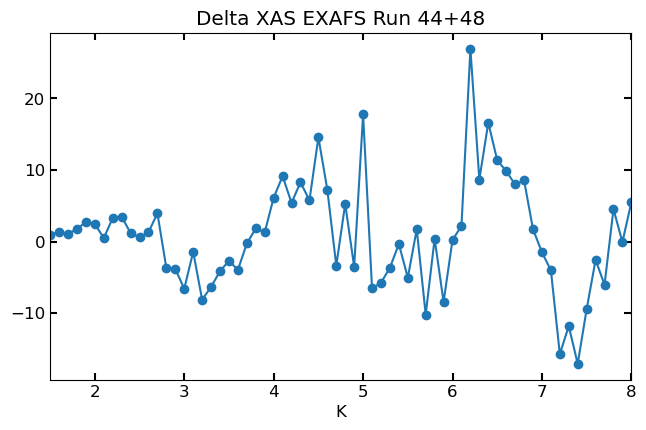

In [19]:
k=eV_to_K(xas.ccm_bins[arg_7130:])
plt.plot(k,(on-off)[arg_7130:]*k**3,'o-')
plt.xlim(1.5,8)
plt.title('Delta XAS EXAFS Run 44+48')
plt.xlabel('K')

Text(0.5, 0, 'K')

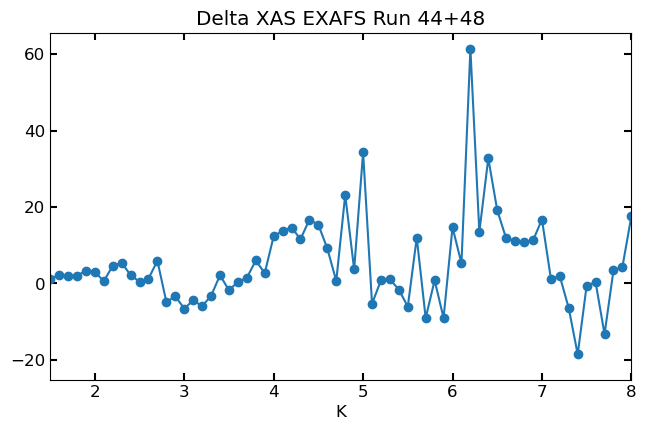

In [60]:
k=eV_to_K(xas.ccm_bins[arg_7130:])
plt.plot(k,(on-off)[arg_7130:]*k**3,'o-')
plt.xlim(1.5,8)
plt.title('Delta XAS EXAFS Run 44+48')
plt.xlabel('K')

In [113]:
def eV_to_K(energy_eV):
    """
    Convert energy (eV) to wavenumber (K) for the specified element.

    Parameters:
    - energy_eV (float): The energy value in electronvolts (eV).

    Returns:
    - float: The wavenumber in reciprocal angstroms (K).
    """
    energy_eV=energy_eV*1000
    threshold_energy = 7130
    K_value = (0.2625 * (energy_eV - threshold_energy))**0.5
    return K_value

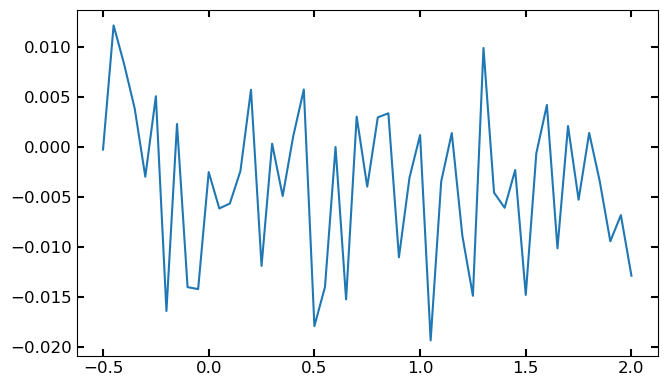

In [432]:
# # en_kin_min, en_kin_max = 7.124, 7.126
# en_kin_min, en_kin_max = 7.117, 7.119

# indx_min = np.argmin(np.abs(xas.ccm_bins - en_kin_min))
# indx_max = np.argmin(np.abs(xas.ccm_bins - en_kin_max))
# kintrace = np.nanmean(diff_svd[:,indx_min:indx_max], axis=1)
# plt.plot(xas.time_bins, kintrace)

# en_kin = 7.1185
en_kin = 7.1145

indx = np.argmin(np.abs(xas.ccm_bins - en_kin))
kintrace = xas.difference_spectrum[:,indx]
plt.plot(xas.time_bins, kintrace)


In [32]:
ana = XSpect.XSpect_PostProcessing.post_analysis()

In [421]:
xas.difference_spectrum.shape

(51, 54)

In [422]:
# np.set_printoptions(threshold=sys.maxsize)
print(xas.difference_spectrum)

[[-6.55713519e-04 -4.59163395e-05  3.97764757e-03 ...  7.34848917e-03
   5.36609479e-03 -7.24319033e-03]
 [ 1.54764448e-03  3.08549894e-03  7.44956868e-03 ... -2.53729070e-02
  -8.23009903e-04 -1.25375780e-02]
 [ 1.48132952e-03  3.89384177e-03  2.72766676e-03 ...  5.18056925e-02
  -1.47341459e-02  4.88107604e-03]
 ...
 [ 3.55457754e-03 -2.75947740e-03 -2.05382413e-03 ... -6.25308149e-02
  -5.46653793e-02 -5.75897670e-02]
 [-3.69409103e-03  2.65321155e-03  1.48315671e-03 ... -9.49814882e-02
  -5.95251502e-02 -4.61738598e-02]
 [-1.51270736e-03 -2.49475751e-03 -3.72746179e-03 ... -1.14526021e-01
  -1.39481150e-01 -3.85604978e-02]]


**SVD**

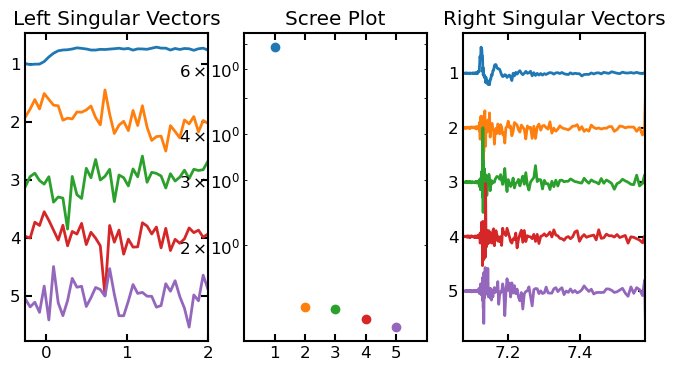

In [76]:
ncomp = 5
diff = np.nan_to_num(xas.difference_spectrum)
ana.svdplot(xas.time_bins, xas.ccm_bins, diff, ncomp)

SVD Reconstruction performed with 5 components


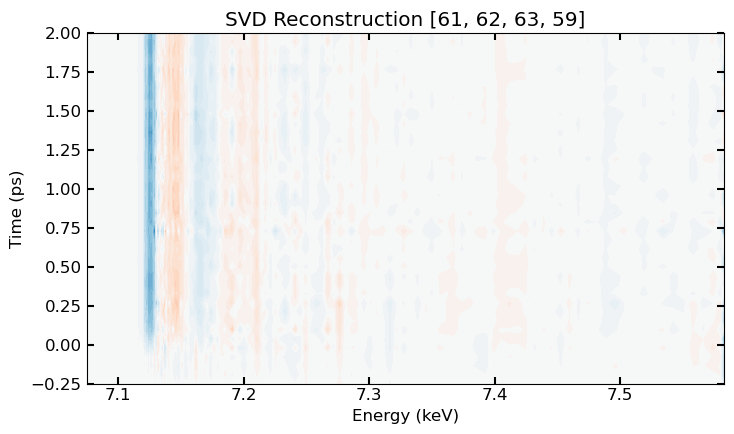

In [77]:
nsvd = 5
diff_svd = ana.svdreconstruct(diff, nsvd)
plotmax = np.max(np.abs(diff_svd))
contlevels = np.linspace(-plotmax, plotmax, 50)
plt.contourf(xas.ccm_bins, xas.time_bins, diff_svd, contlevels, cmap = 'RdBu')
plt.title(f'SVD Reconstruction {xas.runs}')

plt.xlabel('Energy (keV)')
plt.ylabel('Time (ps)')
plt.tight_layout()
plt.savefig(f'SVD Reconstruction {xas.runs}.jpg')

(7.115, 7.185)

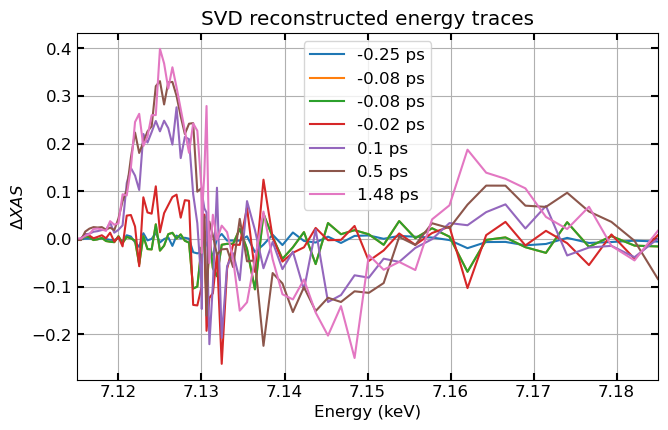

In [78]:
tlist = [-0.4, -0.1, -0.06, -0.02, 0.1, 0.5, 1.5]
# tlist = [-2, 0, 5, 10, 20]
leglist = []

for ii in tlist:
    b = np.min(np.abs(xas.time_bins-ii))
    indx = np.argmin(np.abs(xas.time_bins-ii))
    plt.plot(xas.ccm_bins, diff_svd[indx,:])
    leglist.append('{} ps'.format(np.round(xas.time_bins[indx], decimals = 2)))
plt.legend(leglist)
plt.grid()
plt.xlabel('Energy (keV)')
plt.ylabel(r'$\Delta XAS$')
plt.title('SVD reconstructed energy traces')
plt.xlim(7.115,7.185)

Text(0.5, 0, 'Time (ps)')

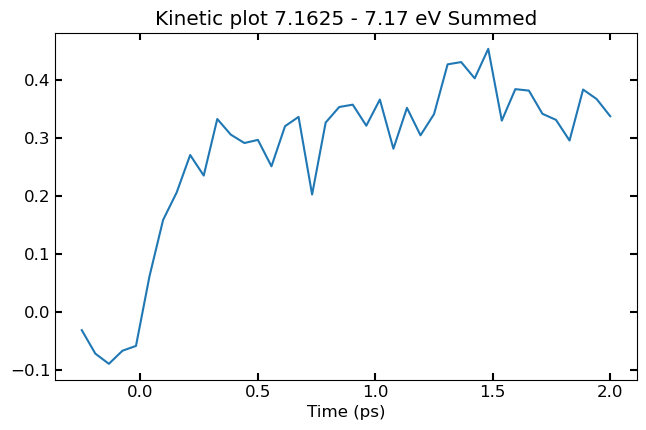

In [79]:
# en_kin_min, en_kin_max = 7.124, 7.126

# indx_min = np.argmin(np.abs(xas.ccm_bins - en_kin_min))
# indx_max = np.argmin(np.abs(xas.ccm_bins - en_kin_max))
# kintrace = np.nanmean(diff_svd[:,indx_min:indx_max], axis=1)
# plt.plot(xas.time_bins, kintrace)

low=7.1625
hi=7.17

low_e=np.argmin(np.abs(xas.ccm_bins-low))
hi_e=np.argmin(np.abs(xas.ccm_bins-hi))
kintrace = np.sum(diff_svd[:,low_e:hi_e],axis=1)
plt.plot(xas.time_bins, kintrace)

plt.title(f'Kinetic plot {low} - {hi} eV Summed')
plt.xlabel('Time (ps)')

**Global Kinetic Analysis**

Fit Parameters:
{'k': array([2.30450175, 0.03414612]), 'center': array([0.04419262]), 'sigma': array([0.07348584]), 'amplitudes': array([], dtype=float64)}

Cost:
10.68872574245476

tau1: 0.4339332786167651 ps
tau2: 29.285900027052246 ps
IRF center: 0.044192617450851034 ps
IRF FWHM: 0.1730459193728022 ps


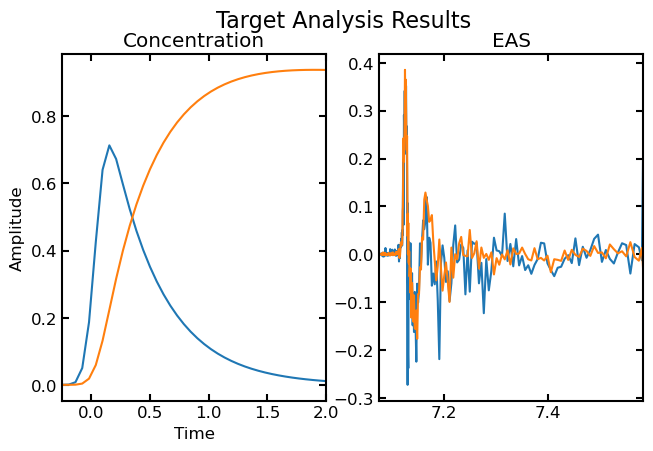

In [80]:
k_guess = [0.2, 0.001]
irf_t0_guess = [0]
irf_sigma_guess = [0.1]
# data2fit = diff_svd
data2fit = np.nan_to_num(xas.difference_spectrum)

K_guess = lambda x:np.array([(-x[0], 0), (x[0], -x[1])]) # sequential
X0_guess = [1,0] # sequential

# K_guess = lambda x:np.array([(-x[0], 0), (0, -x[1])]) # parallel
# X0_guess = [1,1] # parallel

fit, Cfit, Efit = ana.targetanalysis_run(data2fit, xas.time_bins, K_guess, k_guess, irf_t0_guess, irf_sigma_guess, X0_guess, y = xas.ccm_bins)

print('')
print('tau1: {} ps'.format(1/fit.x[0]))
print('tau2: {} ps'.format(1/fit.x[1]))
print('IRF center: {} ps'.format(fit.x[2]))
print('IRF FWHM: {} ps'.format(2*np.sqrt(2*np.log(2))*fit.x[3]))

**Overlay fit w/ Time Trace**

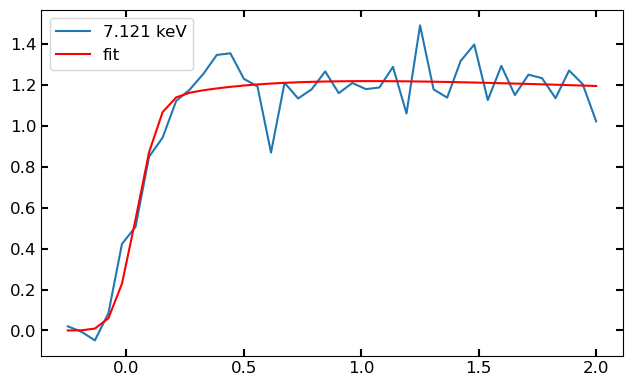

In [85]:
Afit = Cfit@np.transpose(Efit)
Afit.shape

# en_kin_min, en_kin_max = 7.120, 7.122
en_kin = 7.121

# indx_min = np.argmin(np.abs(xas.ccm_bins - en_kin_min))
# indx_max = np.argmin(np.abs(xas.ccm_bins - en_kin_max))
# kintrace_fit = np.nanmean(Afit[:,indx_min:indx_max], axis=1)
# kintrace = np.nanmean(data2fit[:,indx_min:indx_max], axis=1)
low=7.124
hi=7.126

low_e=np.argmin(np.abs(xas.ccm_bins-low))
hi_e=np.argmin(np.abs(xas.ccm_bins-hi))
kintrace = np.sum(diff_svd[:,low_e:hi_e],axis=1)

kintrace_fit = np.sum(Afit[:,low_e:hi_e],axis=1)
kintrace = np.sum(data2fit[:,low_e:hi_e],axis=1)
plt.plot(xas.time_bins, kintrace)
plt.plot(xas.time_bins, kintrace_fit, color='r')
# plt.legend(['{} keV'.format((en_kin_min+en_kin_max)/2), 'fit'])
plt.legend(['{} keV'.format(xas.ccm_bins[indx]), 'fit'])

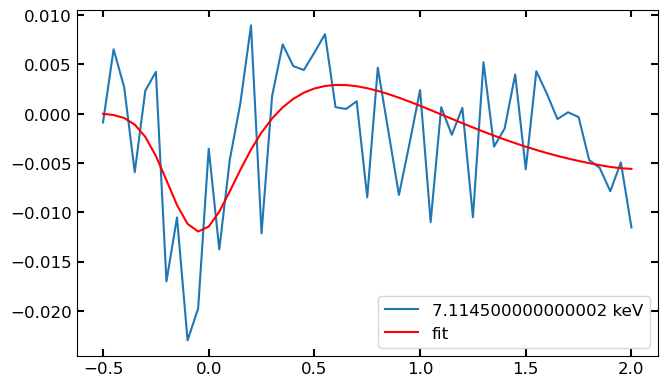

In [402]:
Afit = Cfit@np.transpose(Efit)
Afit.shape

# en_kin = 7.118
en_kin = 7.1145

indx = np.argmin(np.abs(xas.ccm_bins - en_kin))
kintrace_fit = Afit[:,indx]
kintrace = data2fit[:,indx]
plt.plot(xas.time_bins, kintrace)
plt.plot(xas.time_bins, kintrace_fit, color='r')
plt.legend(['{} keV'.format(xas.ccm_bins[indx]), 'fit'])

Fit Parameters:
{'k': array([0.15132422]), 'center': array([-0.16054242]), 'sigma': array([0.05295148]), 'amplitudes': array([], dtype=float64)}

Cost:
2.0515788680372227

tau1: 6.608327469270773 ps
IRF center: -0.16054242393681778 ps
IRF FWHM: 0.12469121346702511 ps


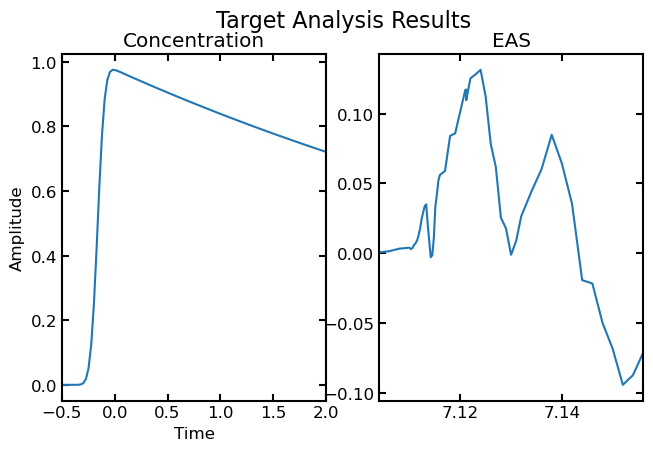

In [153]:
k_guess = [0.001]
irf_t0_guess = [0]
irf_sigma_guess = [0.1]
# data2fit = diff_svd
data2fit = np.nan_to_num(xas.difference_spectrum)

K_guess = lambda x:np.array([-x[0]])
X0_guess = [1]

fit, Cfit, Efit = ana.targetanalysis_run(data2fit, xas.time_bins, K_guess, k_guess, irf_t0_guess, irf_sigma_guess, X0_guess, y = xas.ccm_bins)
print('')
print('tau1: {} ps'.format(1/fit.x[0]))
print('IRF center: {} ps'.format(fit.x[1]))
print('IRF FWHM: {} ps'.format(2*np.sqrt(2*np.log(2))*fit.x[2]))

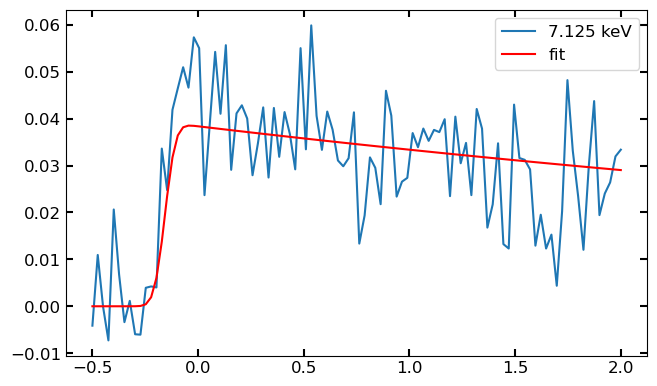

In [322]:
Afit = Cfit@np.transpose(Efit)
Afit.shape

en_kin_min, en_kin_max = 7.124, 7.126

indx_min = np.argmin(np.abs(xas.ccm_bins - en_kin_min))
indx_max = np.argmin(np.abs(xas.ccm_bins - en_kin_max))
kintrace_fit = np.nanmean(Afit[:,indx_min:indx_max], axis=1)
kintrace = np.nanmean(data2fit[:,indx_min:indx_max], axis=1)
plt.plot(xas.time_bins, kintrace)
plt.plot(xas.time_bins, kintrace_fit, color='r')
plt.legend(['{} keV'.format((en_kin_min+en_kin_max)/2), 'fit'])

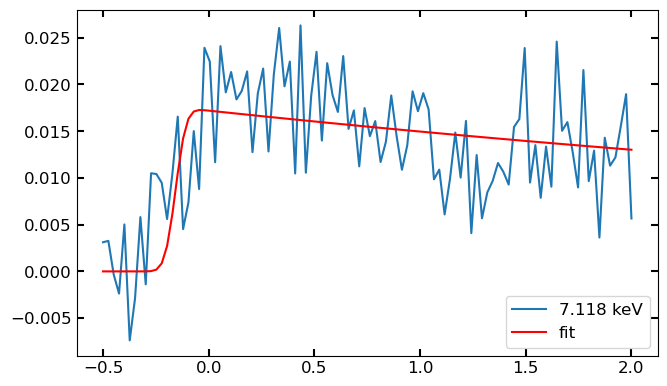

In [323]:
Afit = Cfit@np.transpose(Efit)
Afit.shape

en_kin = 7.118

indx = np.argmin(np.abs(xas.ccm_bins - en_kin))
kintrace_fit = Afit[:,indx]
kintrace = data2fit[:,indx]
plt.plot(xas.time_bins, kintrace)
plt.plot(xas.time_bins, kintrace_fit, color='r')
plt.legend(['{} keV'.format(en_kin), 'fit'])

<font size=5>XAS Analysis and Visualization Test</font>

**1D XAS**

In [2]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsl1030422')
xas=XSpect.XSpect_Controller.XASBatchAnalysis_1D_ccm()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
xas.add_filter('xray','ipm',500.0)
xas.add_filter('simultaneous','ipm',500.0)
# xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['255'])
# xas.primary_analysis_parallel_loop(4,xas_experiment)
xas.primary_analysis_loop(xas_experiment)
end=time.time()

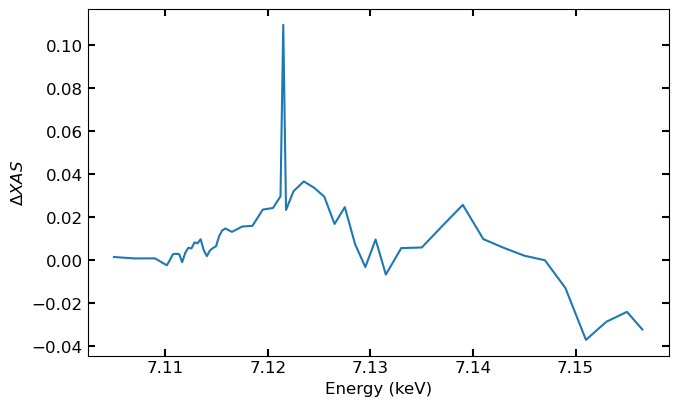

In [3]:
v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas,
                  xas_laser_key='epix_simultaneous_laser_energy_binned',
                  xas_key='epix_xray_not_laser_energy_binned',
                  norm_laser_key='ipm_simultaneous_laser_energy_binned',
                  norm_key='ipm_xray_not_laser_energy_binned')
v.plot_1d_difference_spectrum(xas)

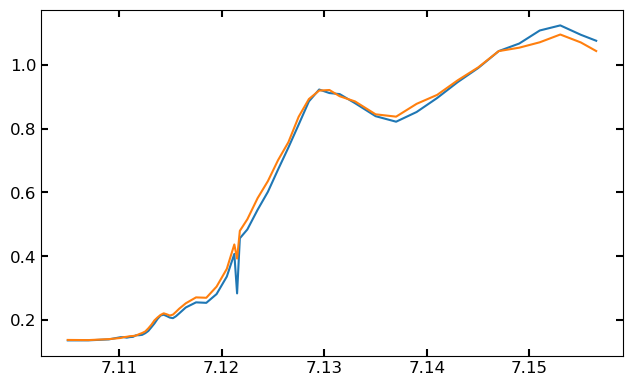

In [12]:
energy = xas.analyzed_runs[0].ccm_bins[:]
lasoff = xas.analyzed_runs[0].epix_xray_not_laser_energy_binned[:]
lason = xas.analyzed_runs[0].epix_simultaneous_laser_energy_binned[:]
ipmoff = xas.analyzed_runs[0].ipm_xray_not_laser_energy_binned[:]
ipmon = xas.analyzed_runs[0].ipm_simultaneous_laser_energy_binned[:]
# plt.plot(energy, lasoff)
# plt.plot(energy, lason)
# plt.plot(energy, ipmoff)
# plt.plot(energy, ipmon)
plt.plot(energy, lasoff/ipmoff)
plt.plot(energy, lason/ipmon)

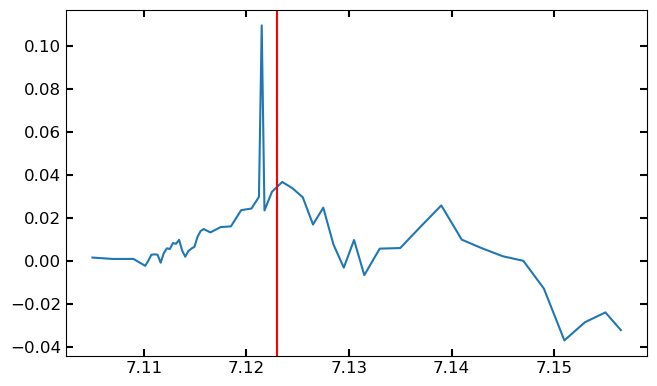

In [14]:
diff = (lason/ipmon) - (lasoff/ipmoff)
plt.plot(energy, diff)
plt.axvline(7.123, color = 'r')

**1D Time Scan**

In [4]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsl1030422')
xas=XSpect.XSpect_Controller.XASBatchAnalysis_1D_time()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
xas.add_filter('xray','ipm',500.0)
xas.add_filter('simultaneous','ipm',500.0)
xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['211-213'])
xas.mintime = -1
xas.maxtime = 1
xas.numpoints = 20
# xas.primary_analysis_parallel_loop(4,xas_experiment)
xas.primary_analysis_loop(xas_experiment)
end=time.time()

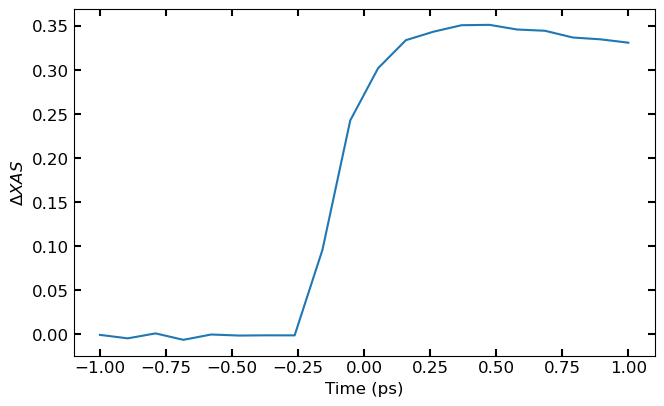

In [5]:
v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas,
                  xas_laser_key='epix_simultaneous_laser_time_binned',
                  xas_key='epix_xray_not_laser_time_binned',
                  norm_laser_key='ipm_simultaneous_laser_time_binned',
                  norm_key='ipm_xray_not_laser_time_binned')
v.plot_1d_difference_time(xas)